In [2]:
library(dplyr)
library(egg)
library(ggplot2)
library(grid)
library(gtable)
library(MatrixGenerics)
library(openssl)
library(reshape2)
library(scales)
library(Seurat)
library(stringr)
library(tibble)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: gridExtra


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Loading required package: ggplot2

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, col

In [1]:
testis <- readRDS("~/Fly-Cell-Atlas-GLM/testis-spca.rds")

In [3]:
FetchData(
  testis,
  c("UMAP_1", "UMAP_2"),
  cells = Cells(testis) %>%
    subset(testis$ident == "head cyst cell")
) %>%
  summarise(
    across(
      everything(),
      list(
        L = \(v) quantile(v, 0.005),
        U = \(v) quantile(v, 0.995)
      )
    )
  )

UMAP_1_L  UMAP_1_U UMAP_2_L UMAP_2_U 
1 0.8905349 4.335217 -12.1978 -10.91311

In [4]:
FetchData(
  testis,
  c("UMAP_1", "UMAP_2"),
  cells = Cells(testis) %>%
    subset(grepl("epit", testis$ident))
) %>%
  summarise(
    across(
      everything(),
      list(
        L = \(v) quantile(v, 0.005),
        U = \(v) quantile(v, 0.995)
      )
    )
  )

UMAP_1_L UMAP_1_U UMAP_2_L  UMAP_2_U 
1 3.297675 9.487593 -11.42517 0.2113966

In [5]:
FetchData(
  testis,
  c("UMAP_1", "UMAP_2"),
  cells = Cells(testis) %>%
    subset(grepl("cyst", testis$ident) & !grepl("head", testis$ident))
) %>%
  summarise(
    across(
      everything(),
      list(
        L = \(v) quantile(v, 0.005),
        U = \(v) quantile(v, 0.995)
      )
    )
  )

UMAP_1_L  UMAP_1_U   UMAP_2_L  UMAP_2_U 
1 -10.95349 -0.2566876 -12.01643 -7.615948

In [6]:
FetchData(
  testis,
  c("UMAP_1", "UMAP_2"),
  cells = Cells(testis) %>%
    subset(grepl("muscl", testis$ident))
) %>%
  summarise(
    across(
      everything(),
      list(
        L = \(v) quantile(v, 0.005),
        U = \(v) quantile(v, 0.995)
      )
    )
  )

UMAP_1_L  UMAP_1_U  UMAP_2_L  UMAP_2_U 
1 -6.333689 -3.556764 -1.943703 0.3510544

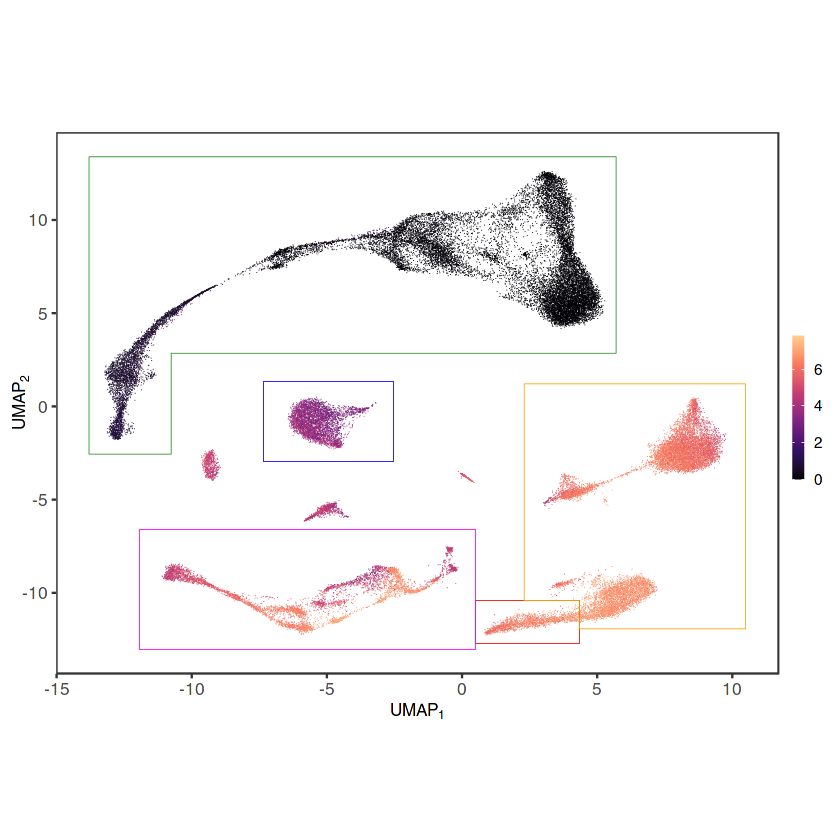

In [13]:
theme_set(
  theme_bw() +
    theme(
      axis.text = element_text(size = unit(10, "pt")),
      axis.title = element_text(size = unit(10, "pt")),
      panel.grid = element_blank(),
      legend.background = element_blank(),
      legend.box.spacing = unit(1, "mm"),
    )
)
testis$SPC1 <- (
  pull(FetchData(testis, "FEATURE_1")) -
    min(pull(FetchData(testis, "FEATURE_1", cells = Cells(testis) %>% subset(testis$batch == "sample1"))))
)
inset <- tribble(
  ~UMAP_1, ~UMAP_2,
  -13.8, -2.56,
  -13.8, 13.39,
  5.7, 13.39,
  5.7, 2.85,
  -10.76, 2.85,
  -10.76, -2.56,
)
anno.inset <- annotate(
  "polygon",
  x = inset$UMAP_1,
  y = inset$UMAP_2, fill = "transparent",
  color = "forestgreen", linewidth = 0.5 * 25.4 / 72
)
epi.x1 <- 2.30
epi.x2 <- 4.34
epi.x3 <- 10.49
epi.y1 <- -11.93
epi.y2 <- -10.41
epi.y3 <- 1.21
cy.x1 <- -11.95
cy.x2 <- 0.5
cy.y1 <- -13.02
cy.y2 <- -6.62
mscl.x1 <- -7.33
mscl.x2 <- -2.55
mscl.y1 <- -2.94
mscl.y2 <- 1.35
compartment <- list(
  G = "forestgreen",
  Cy = "magenta",
  HCy = "red",
  epi = "orange",
  M = "blue",
  others = "#cccccc"
)
anno.all <- list(
  anno.inset,
  annotate(
    "rect",
    xmin = cy.x2, xmax = epi.x2,
    ymin = -12.70, ymax = epi.y2,
    fill = "transparent",
    color = "red", linewidth = 0.5 * 25.4 / 72
  ),
  annotate(
    "polygon",
    x = c(epi.x1, epi.x1, epi.x3, epi.x3, epi.x2, epi.x2, epi.x1),
    y = c(epi.y2, epi.y3, epi.y3, epi.y1, epi.y1, epi.y2, epi.y2),
    fill = "transparent",
    color = "orange", linewidth = 0.5 * 25.4 / 72
  ),
  annotate(
    "rect",
    xmin = cy.x1, xmax = cy.x2,
    ymin = cy.y1, ymax = cy.y2,
    fill = "transparent",
    color = "magenta", linewidth = 0.5 * 25.4 / 72
  ),
  annotate(
    "rect",
    xmin = mscl.x1, xmax = mscl.x2,
    ymin = mscl.y1, ymax = mscl.y2,
    fill = "transparent",
    color = "blue", linewidth = 0.5 * 25.4 / 72
  )
)
(
  lnplot <- FetchData(testis, c("UMAP_1", "UMAP_2", "SPC1")) %>%
    dplyr::rename(Y=3) %>%
    rownames_to_column() %>%
    as_tibble() %>%
    arrange(md5(rowname)) %>%
    ggplot(aes(UMAP_1, UMAP_2, fill=Y)) +
    geom_point(stroke=NA, shape=21, size=0.025) +
    scale_fill_viridis_c(option = "magma", end = 0.9, limits = c(0, NA), oob=squish) +
    guides(fill = guide_colorbar(title = NULL, barwidth = 0.5)) +
    labs(x = bquote(UMAP[1]), y = bquote(UMAP[2])) +
    theme(
      aspect.ratio = 3/4,
      axis.title.x = element_text(margin = margin(2, 0, -10, 0)),
      axis.title.y = element_text(margin = margin(0, -7, 0, 2)),
    )
) +
  anno.all
cells_inset <- pull(
  subset(
    lnplot$data,
      (between(UMAP_1, -13.8, -10.76) & between(UMAP_2, -2.56, 13.39)) |
        (between(UMAP_1, -10.76, 5.7) & between(UMAP_2, 2.85, 13.39)),
    select = rowname
  )
)

In [14]:
summary(
  pull(FetchData(testis, "FEATURE_1")) -
    min(pull(FetchData(testis, "FEATURE_1", cells = Cells(testis) %>% subset(testis$batch == "sample1"))))
)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.57987  0.01086  3.25365  3.01340  5.95731  7.81192 

In [15]:
summary(
  pull(FetchData(testis, "FEATURE_45")) -
    min(pull(FetchData(testis, "FEATURE_45", cells = Cells(testis) %>% subset(testis$batch == "sample1"))))
)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-1.051909  0.008545  0.434550  1.092948  1.115680 16.208633 

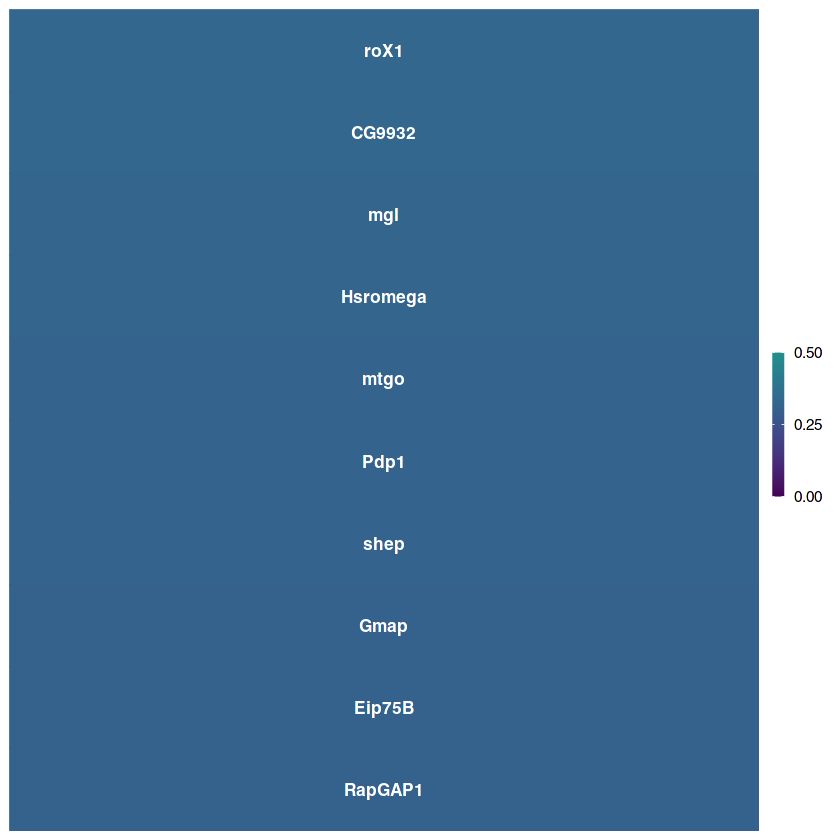

In [4]:
spca <- testis[["spca"]]
rownames(spca@feature.loadings) <-
  rownames(spca@feature.loadings) %>%
    str_replace("lncRNA:", "")
spc_tile_plot <- function (spca, column, fontface = "bold", option = "viridis", 
    begin = 0, end = 1, fontsize = 4) 
{
    if (begin < 0) {
        y <- c(seq_gradient_pal("#e0524d", viridis(10)[1])(seq(0, 
            1, length.out = abs(round(begin * 100)))[-abs(round(begin * 
            100))]), viridis(101)[1:(1 + round(end * 100))])
        scl <- scale_fill_gradientn(limits = c(begin, end + 1e-10), 
            colors = y, na.value = "#000000")
    }
    else {
        scl <- scale_fill_viridis_c(limits = c(begin, end), breaks = seq(begin, 
            end, length.out = 3), option = option, begin = begin, 
            end = end, na.value = "#000000")
    }
    vals <- spca[, column, drop = T] %>% sort(dec = T) %>% subset(. != 
        0)
    if ("..." %in% rownames(spca@feature.loadings)) 
        vals <- c(vals[vals > 0], ... = NA, vals[vals < 0])
    list(spc.genes = names(vals)) %>% with(data.frame(gene = factor(spc.genes, 
        levels = spc.genes), loading = as.numeric(vals))) %>% 
        ggplot() + geom_tile(aes(x = "", y = gene, fill = loading), 
        color = NA) + geom_text(aes(x = "", y = gene, label = gene), 
        size = fontsize, fontface = fontface, color = "white") + 
        scl + scale_x_discrete(breaks = NULL, expand = c(0, 0)) + 
        scale_y_discrete(breaks = NULL, limits = rev, expand = c(0, 
            0)) + labs(x = NULL, y = NULL) +
        theme(panel.border = element_blank())
}
# Convert fontsize to mm
(FL <- spc_tile_plot(spca, "FEATURE_1", fontsize=10 * 25.4/72, end = 0.5) + guides(fill = guide_colorbar(title = NULL, barwidth = 0.5)))

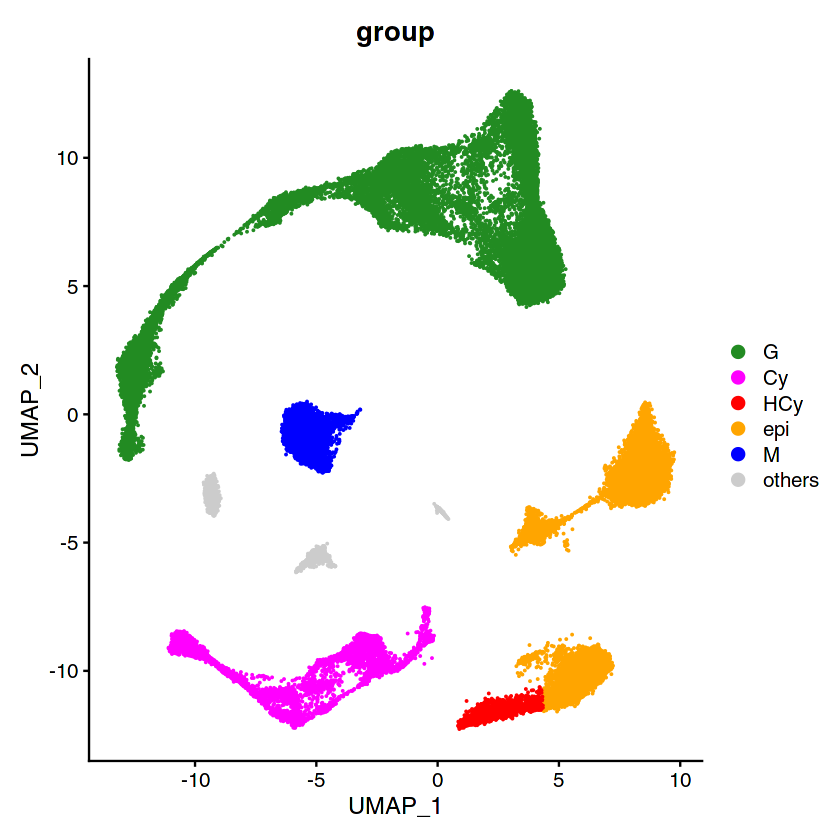

In [5]:
testis$group <- "others"
testis$group[
  with(
    FetchData(testis, c("UMAP_1", "UMAP_2")),
    (UMAP_1 <= -10 & UMAP_2 >= -2.5) |
      (between(UMAP_1, -10, 6) & UMAP_2 >= 2.5)
  )
] <- "G"
testis$group[
  with(
    FetchData(testis, c("UMAP_1", "UMAP_2")),
    between(UMAP_1, cy.x1, cy.x2) & between(UMAP_2, cy.y1, cy.y2)
  )
] <- "Cy"
testis$group[
  with(
    FetchData(testis, c("UMAP_1", "UMAP_2")),
    between(UMAP_1, cy.x2, epi.x2) & between(UMAP_2, -12.70, epi.y2)
  )
] <- "HCy"
testis$group[
  with(
    FetchData(testis, c("UMAP_1", "UMAP_2")),
    between(UMAP_1, mscl.x1, mscl.x2) & between(UMAP_2, mscl.y1, mscl.y2)
  )
] <- "M"
testis$group[
  with(
    FetchData(testis, c("UMAP_1", "UMAP_2")),
    (between(UMAP_1, epi.x1, epi.x2) & between(UMAP_2, epi.y2, epi.y3)) |
      (between(UMAP_1, epi.x2, epi.x3) & between(UMAP_2, epi.y1, epi.y3))
  )
] <- "epi"
testis$group <- testis$group %>% factor(names(compartment))
DimPlot(testis, gr="group") + scale_color_manual(values = unlist(compartment))

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


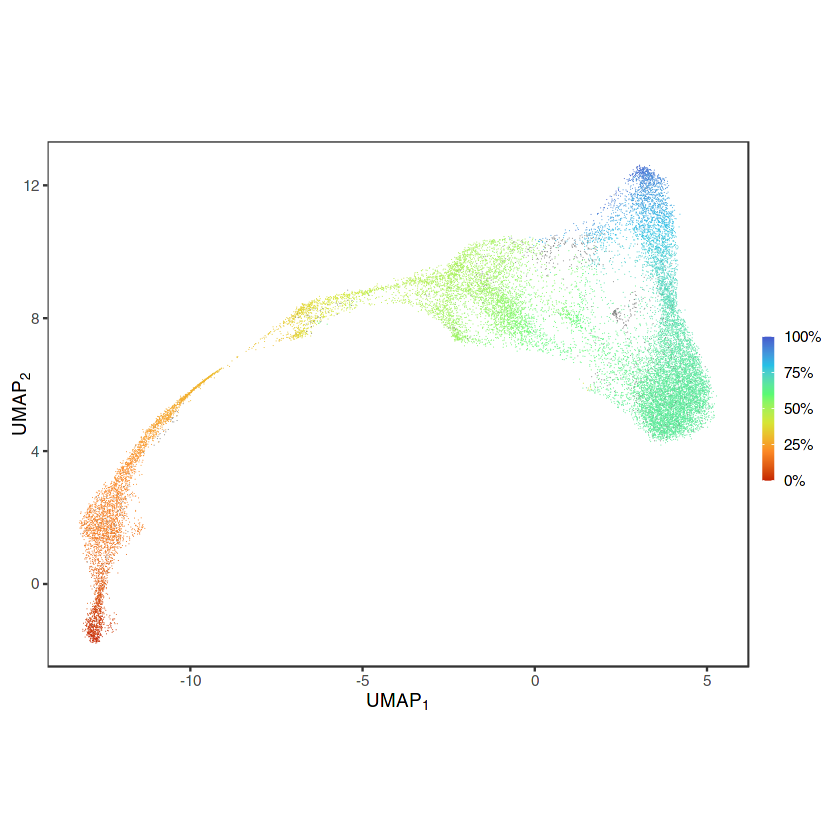

In [6]:
ptplot <- lnplot +
  scale_fill_viridis_c(option = "turbo", begin = 0.1, end = 0.9, direction = -1, labels = percent)
ptplot$data$Y <- pull(FetchData(testis, "slingshot.germ.spca", cells = ptplot$data$rowname))
ptplot$data <- ptplot$data[match(cells_inset, ptplot$data$rowname), ]
ptplot

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


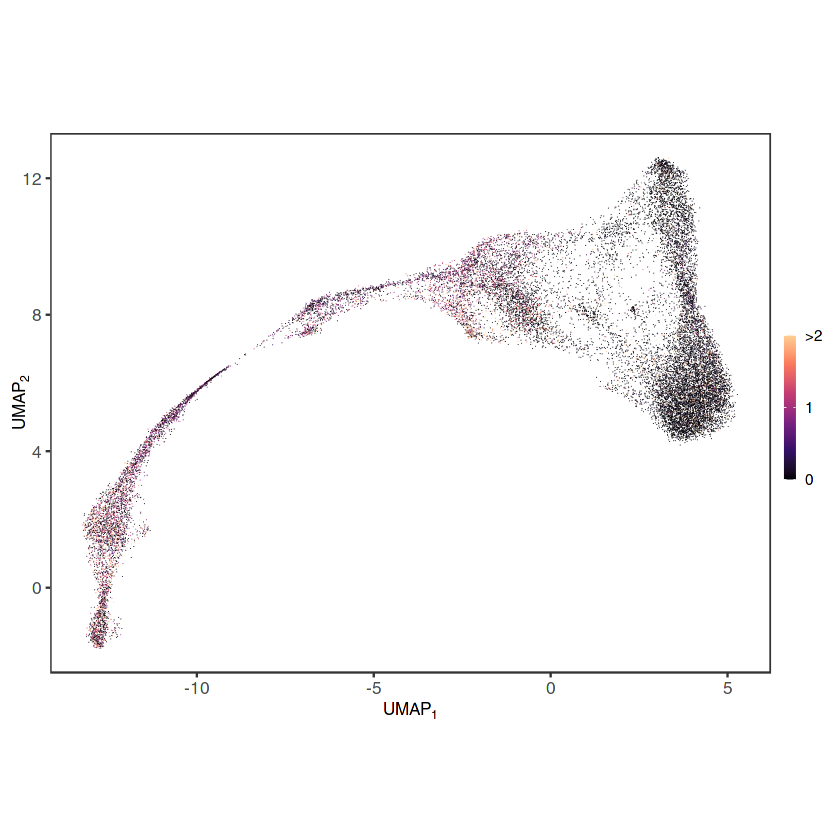

In [16]:
cyca_scale <- scale_fill_viridis_c(option = "magma", end = 0.9, limits = c(0, NA), breaks = pretty_breaks(2), oob=squish,
  labels = \(v) as.character(v) %>% replace(. == "2", ">2")
)
cyca <- lnplot + cyca_scale
cyca$data$Y <- pull(FetchData(testis, "CycA", cells = cyca$data$rowname)) %>%
  pmin(2)
cyca$data <- cyca$data[match(cells_inset, cyca$data$rowname), ]
cyca

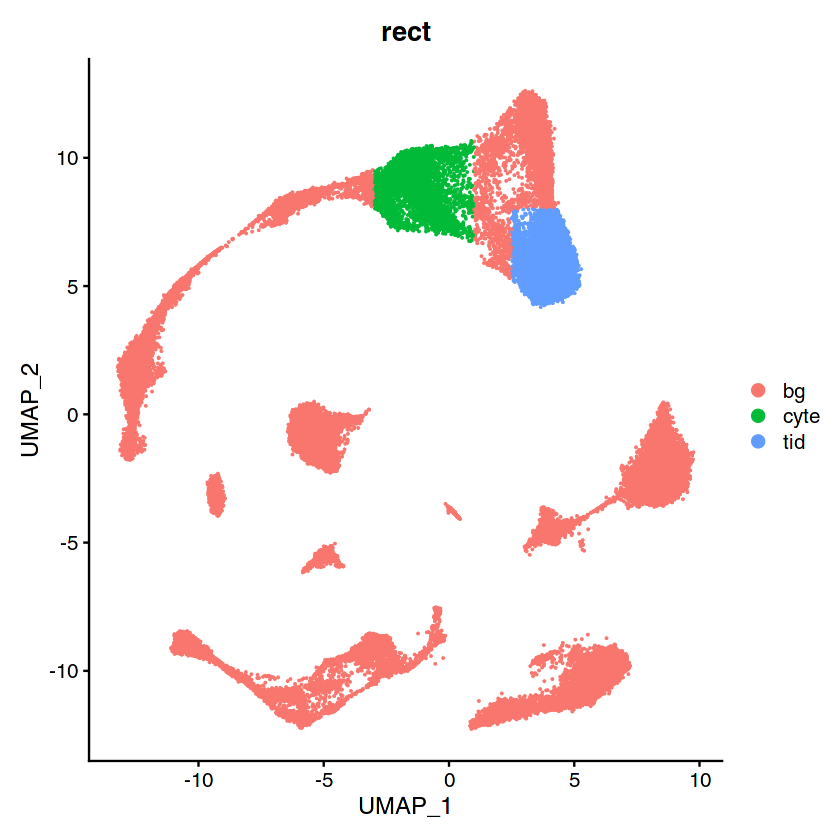

In [8]:
testis$rect <- "bg"
testis$rect[
  with(FetchData(testis, c("UMAP_1", "UMAP_2")), between(UMAP_1, -3, 1) & between(UMAP_2, 6, 12))
] <- "cyte"
testis$rect[
  with(FetchData(testis, c("UMAP_1", "UMAP_2")), between(UMAP_1, 2.5, 6) & between(UMAP_2, 4, 8))
] <- "tid"
DimPlot(testis, gr="rect")

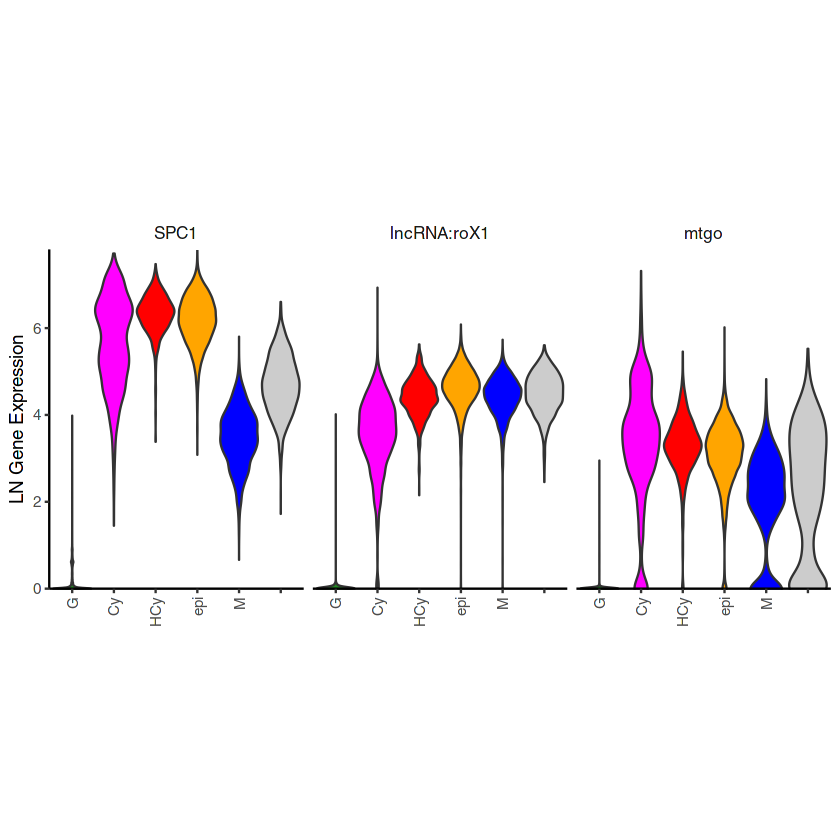

In [9]:
(
  violins <-
    FetchData(
      testis,
      c("group", "SPC1", "lncRNA:roX1", "mtgo")
    ) %>%
      melt(id.vars = "group") %>%
      ggplot(aes(group, value, fill=group)) +
      facet_wrap(vars(variable)) +
      geom_violin(scale = "width") +
      scale_x_discrete(labels = \(v) v %>% replace(. == "others", "")) +
      scale_fill_manual(values = unlist(compartment)) +
      coord_cartesian(
        c(0.45, 6.55),
        c(0, NA),
        expand = F
      ) +
      labs(
        x = NULL,
        y = "LN Gene Expression",
      ) +
      theme(
        aspect.ratio = 4/3,
        axis.line.x = element_line(),
        axis.line.y = element_line(),
        axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5),
        panel.border = element_blank(),
        strip.background = element_rect(fill = "white", color = "transparent"),
        strip.text = element_text(size = unit(10, "pt")),
        legend.position = "none",
      )
)

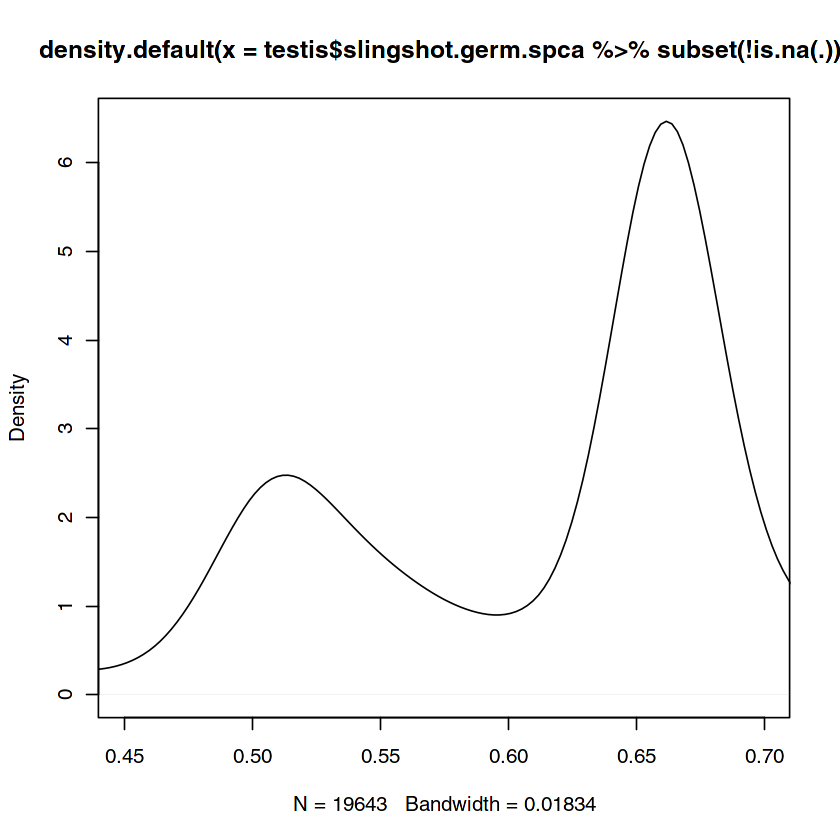

In [10]:
plot(density(testis$slingshot.germ.spca %>% subset(!is.na(.))), xlim=c(0.45, 0.7))

In [77]:
genes_plot <- c("bam", "blanks", "CycA", "exu", "Mst84Da")
features <- FetchData(testis, c("slingshot.germ.spca", genes_plot)) %>%
  summarise(
    x = seq(0, 1, by=0.01),
    across(
      !c(x, slingshot.germ.spca),
      \(v) predict(
        loess(v ~ slingshot.germ.spca, span = 0.25),
        newdata = x
      ) %>%
        pmax(0)
    )
  ) %>%
  print()

Warning message:
“Could not find bam in the default search locations, found in RNA assay instead”
Warning message:
“Could not find Mst84Da in the default search locations, found in RNA assay instead”


       x    rna_bam      blanks       CycA       exu rna_Mst84Da
1   0.00 0.27977589 0.324285085 0.68095735 1.2081993    3.088864
2   0.01 0.30857794 0.305374148 0.69178778 1.1606540    3.094510
3   0.02 0.33542422 0.291135076 0.70153404 1.1169282    3.099154
4   0.03 0.36022889 0.281952464 0.71011585 1.0770162    3.102647
5   0.04 0.38290612 0.278210909 0.71745293 1.0409123    3.104838
6   0.05 0.40337006 0.280295003 0.72346502 1.0086107    3.105578
7   0.06 0.42153489 0.288589343 0.72807183 0.9801056    3.104717
8   0.07 0.43731477 0.303478523 0.73119310 0.9553914    3.102104
9   0.08 0.45062720 0.325343096 0.73275077 0.9344747    3.097594
10  0.09 0.46150959 0.354194555 0.73276547 0.9175527    3.091202
11  0.10 0.47011490 0.389384737 0.73137844 0.9046589    3.083188
12  0.11 0.47659546 0.430197111 0.72873632 0.8957456    3.073827
13  0.12 0.48110363 0.475915145 0.72498575 0.8907648    3.063397
14  0.13 0.48379175 0.525822310 0.72027338 0.8896690    3.052172
15  0.14 0.48481216 0.579

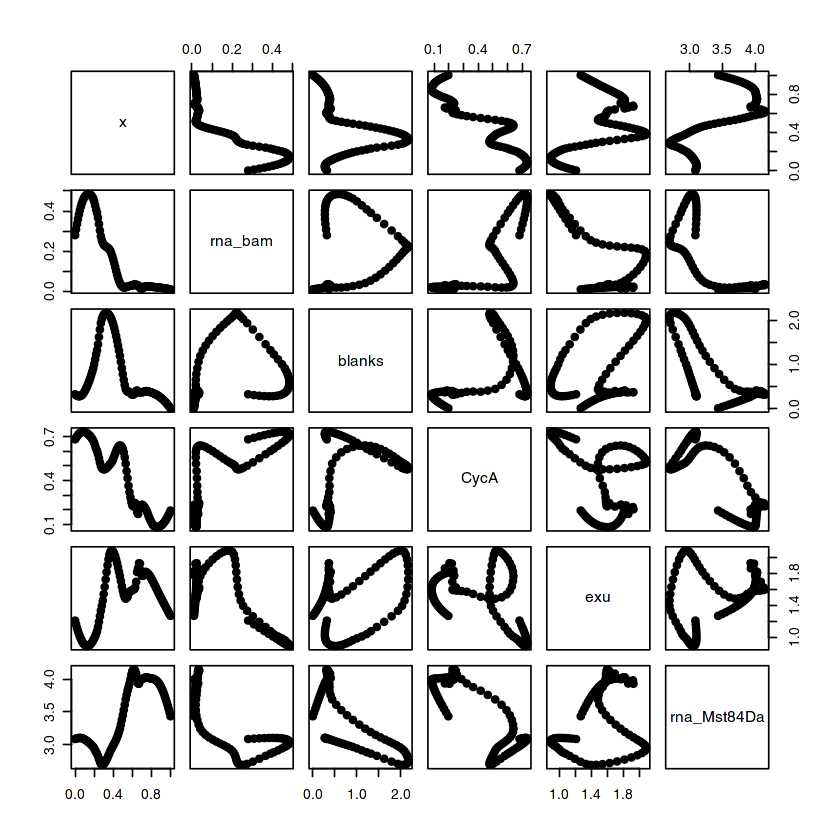

In [78]:
plot(features, pch=19)

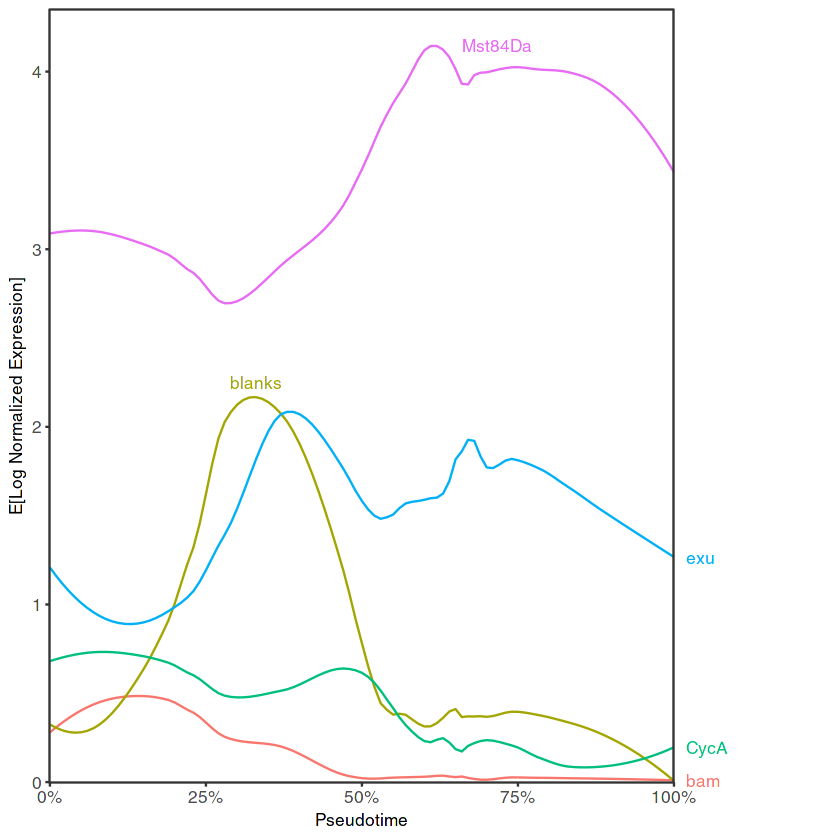

In [79]:
invisible(
  geneLoess <-
    ggplot(
      melt(features, id.vars="x"),
      aes(x, value, color=variable)
    ) +
      geom_line() +
      scale_color_hue("Gene") +
      scale_x_continuous(labels = percent) +
      coord_cartesian(c(0, 1), y=c(0, 1.05 * max(unlist(features[-1]))), expand=F, clip="off") +
      labs(x = "Pseudotime", y = "E[Log Normalized Expression]") +
      theme(legend.position = "none", plot.margin = margin(5.5, 100, 5.5, 5.5))
)
gene_colors <- hue_pal()(5)
gene_x <- rep(1.02, 5)
hjust <- rep(0, 5)
gene_y <- unlist(tail(features[-1], 1))
gene_x[genes_plot == "blanks"] <- features$x[which.max(features$blanks)]
gene_y[genes_plot == "blanks"] <- max(features$blanks) + 0.08
hjust[genes_plot == "blanks"] <- 0.5
gene_x[genes_plot == "Mst84Da"] <- features$x[which.max(features$rna_Mst84Da)] + 0.04
gene_y[genes_plot == "Mst84Da"] <- max(features$rna_Mst84Da)
(
  geneLoess <-
    (line_plot <- geneLoess) +
      annotate(
        "text",
        gene_x,
        gene_y,
        label = genes_plot,
        hjust = hjust,
        color = gene_colors,
        size = 10 * 25.4 / 72
      )
)

Coordinate system already present. Adding new coordinate system, which will
replace the existing one.


x    variable value    
1 0.00 rna_bam  0.2797759
2 0.01 rna_bam  0.3085779
3 0.02 rna_bam  0.3354242
4 0.03 rna_bam  0.3602289
5 0.04 rna_bam  0.3829061
6 0.05 rna_bam  0.4033701

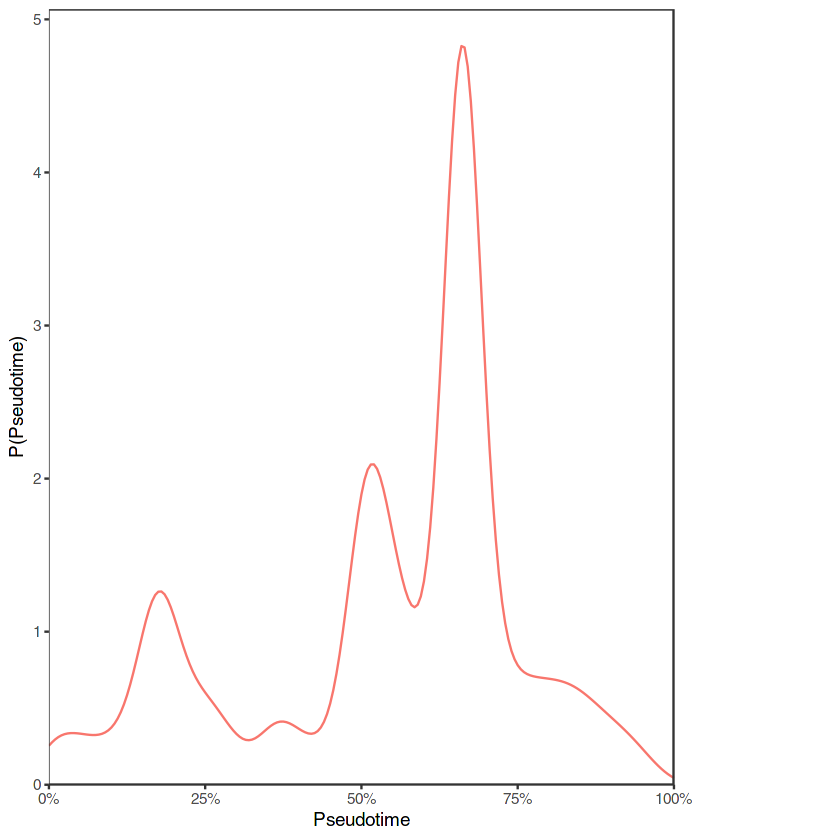

In [14]:
dens.fit <- density(testis$slingshot.germ.spca %>% subset(!is.na(.)), from = 0, to = 1, n = 201, adjust = 1.5)
ptDensity <- line_plot +
  coord_cartesian(y=c(0, 1.05 * max(dens.fit$y)), expand=F) +
  labs(y = "P(Pseudotime)")
head(ptDensity$data)
ptDensity$data <- tibble(
  with(
    dens.fit[c("x", "y")],
    tibble(x, variable = "density", value = y)
  )
)
ptDensity

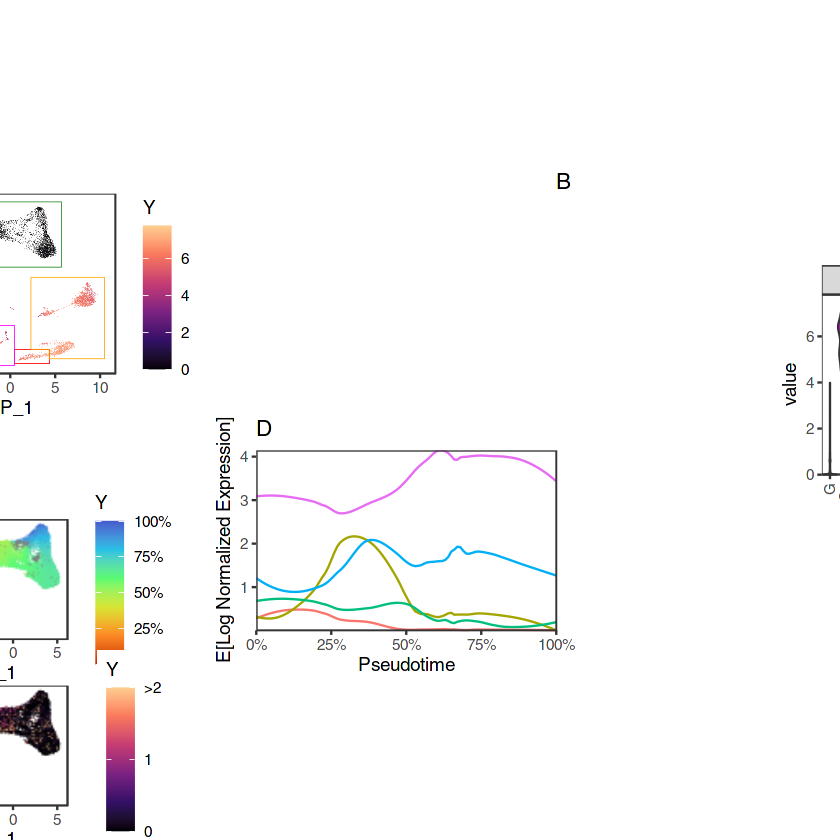

In [ ]:
library(ggrastr)
grid.draw(
  figure <- rbind(
    cbind(
      set_panel_size(
        rasterise(lnplot + anno.all + labs(title = "A"), dpi=600), w = unit(2, "in"), h = unit(1.5, "in")
      ),
      set_panel_size(
        ggplot() + labs(title = "B") + theme_void(), w = unit(2.5, "in"), h = unit(1.5, "in")
      ) %>%
        gtable_add_grob(
          set_panel_size(
            violins,
            w = unit(0.75, "in"),
            h = unit(1.5, "in")
          ),
          t = 9,
          l = 7
        )
    ),
    cbind(
      set_panel_size(
        ggplot() + labs(title = "C") + theme_void(), w = unit(2, "in"), h = unit(1.5, "in")
      ) %>%
        gtable_add_grob(
          rbind(
            set_panel_size(
              rasterize(ptplot),
              w = unit(1.5, "in"),
              h = unit(1, "in")
            ),
            set_panel_size(
              rasterise(cyca),
              w = unit(1.5, "in"),
              h = unit(1, "in")
            )
          ),
          t = 10,
          l = 3,
          r = 9
        ),
      set_panel_size(
        geneLoess + labs(title = "D"), w = unit(2.5, "in"), h = unit(1, "in")
      )
    )
  )
)

In [15]:
convertUnit(
sum((
set_panel_size(
          FL + labs(title = "B"),
          w = unit(0.9, "in"), h = unit(2, "in")
        )
)$heights),
"in"
)

[1] 2.40886605783866inches

In [16]:
ggplot_build(lnplot)$layout$panel_params[[1]]$x$limits

[1] -13.220893   9.754537

In [29]:
ggplot_build(lnplot)$layout$panel_params[[1]]$x$continuous_range

[1] -14.36966  10.90331

In [46]:
1.25 * diff(ggplot_build(cyca)$layout$panel_params[[1]]$x$continuous_range) /
  diff(ggplot_build(lnplot)$layout$panel_params[[1]]$x$continuous_range)

[1] 1.006427

In [ ]:
diff(ggplot_build(cyca)$layout$panel_params[[1]]$y$continuous_range) /
  diff(ggplot_build(cyca)$layout$panel_params[[1]]$x$continuous_range)

[1] 0.7775917

In [32]:
7/9

[1] 0.7777778

In [12]:
summarise(lnplot$data, across(!rowname, list(min = min, max = max)))

UMAP_1_min UMAP_1_max UMAP_2_min UMAP_2_max Y_min      Y_max   
1 -13.22089  9.754537   -12.26925  12.60642   -0.5798742 7.811916

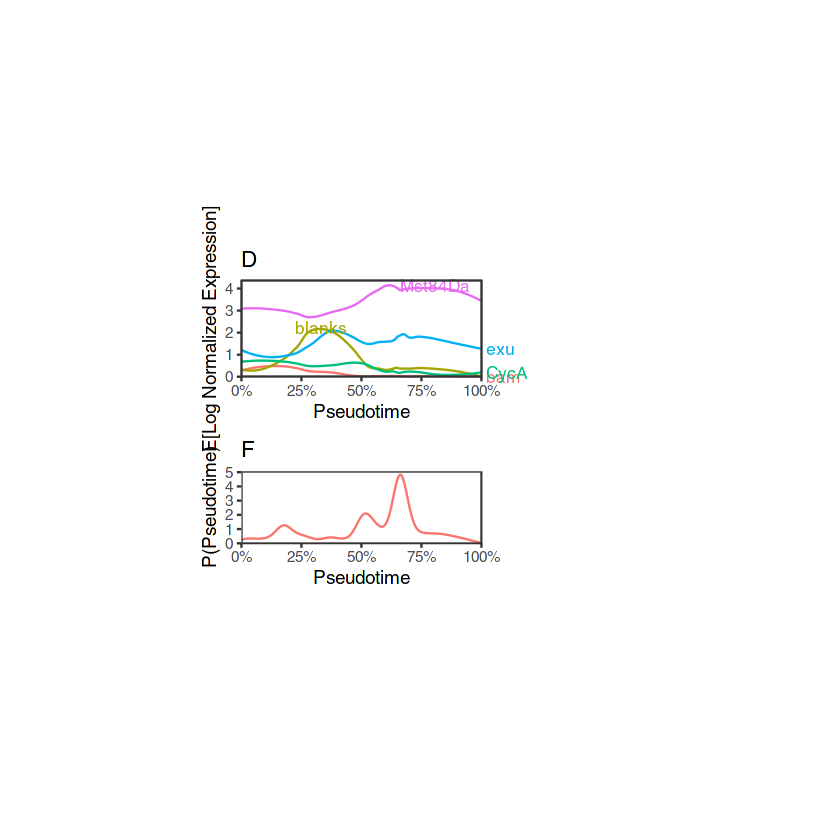

In [88]:
width.D <- unit(2, "in")
height.D <- unit(0.8, "in")
height.F <- unit(0.6, "in")
grid.draw(
  densityPlots <- rbind(
    set_panel_size(geneLoess + labs(title = "D"), w = width.D, h = height.D),
    set_panel_size(ptDensity + labs(title = "F"), w = width.D, h = height.F)
  )
)

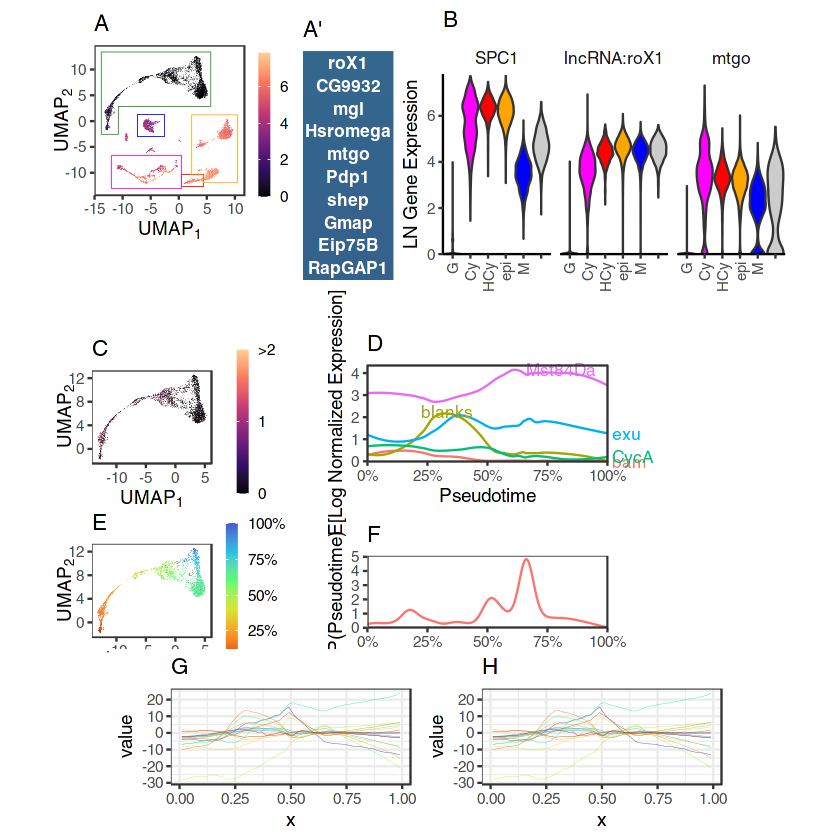

In [131]:
library(ggrastr)
A <- rasterise(lnplot + anno.all + labs(title = "A"), dpi=600)
width.A <- unit(1.25, "in")
height.A <- unit(1.25, "in")
width.D <- unit(1, "in")
height.D <- unit(7/9, "in")
width.G <- unit(2, "in")
height.G <- unit(0.8, "in")
A <- set_panel_size(
  A +
    theme(
      plot.margin = margin(
        5.5, 5.5,
        5.5 + 72 * (2.409 - as.numeric(convertUnit(sum(set_panel_size(A, w=width.A, h=height.A)$heights), "in"))),
        5.5
      )
    ),
  w = width.A,
  h = height.A
)
grid.draw(
  figure <- gtable(
    w = unit(c(2.1, 0.8, 3.3), "in"),
    h = unit(c(2.409, 0.5, 2.5, 1.5), "in")
  ) %>%
    gtable_add_grob(
      list(
        A,
        set_panel_size(
          FL + labs(title = "A'") + theme(legend.position = "none"),
          w = unit(0.75, "in"), h = unit(1.9, "in")
        ),
        set_panel_size(
          violins + labs(title = "B"),
          w = unit(0.9, "in"), h = unit(1.5, "in")
        ),
        rbind(
          set_panel_size(
            rasterise(cyca, dpi=600) + labs(title = "C"),
            w = width.D, h = height.D
          ),
          set_panel_size(
            rasterise(ptplot, dpi=600) + labs(title = "E"),
            w = width.D, h = height.D
          )
        ),
        densityPlots,
        cbind(
          set_panel_size(pca_embedding_plot + labs(title = "G"), w = width.G, h = height.G),
          set_panel_size(spca_embedding_plot + labs(title = "H"), w = width.G, h = height.G)
        )
      ),
      t = c(1, 1, 1, 3, 3, 4),
      l = c(1:3, 1, 2, 1),
      r = c(1:3, 1, 3, 3)
    )
)

In [132]:
ggsave("SPCAFig6.pdf", figure, w=6.2, h=6.75)

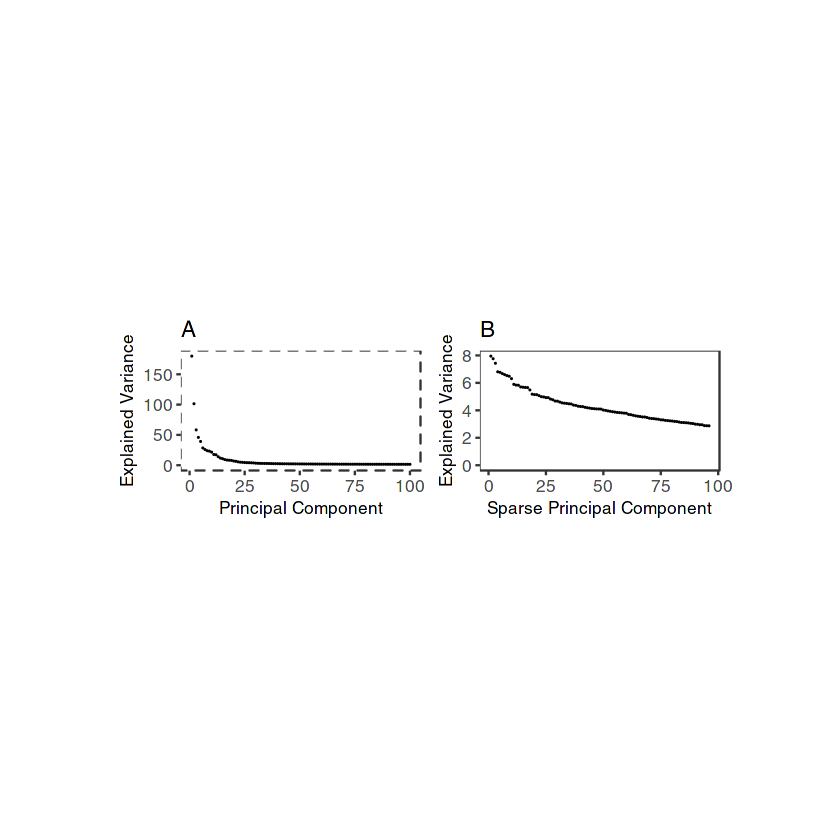

In [192]:
labs <- labs(
  x = "Component",
  y = "Explained Variance"
)
grid.draw(
  elbow <- cbind(
    set_panel_size(
      ggplot(
        enframe(testis[["pca"]]@stdev[1:100]^2),
        aes(name, value)
      ) +
        geom_point(shape=21, color="transparent", fill="black", size = 0.25) +
        coord_cartesian(NULL, c(0, NA)) +
        labs +
        labs(title = "A", x = "Principal Component") +
        theme(panel.border = element_rect(linetype = "99")),
      w = unit(2, "in"),
      h = unit(1, "in")
    ),
    set_panel_size(
      ggplot(
        enframe(testis[["spca"]]@stdev[1:96]^2),
        aes(name, value)
      ) +
        geom_point(shape=21, color="transparent", fill="black", size = 0.25) +
        coord_cartesian(NULL, c(0, NA)) +
        labs +
        labs(title = "B", x = "Sparse Principal Component"),
      w = unit(2, "in"),
      h = unit(1, "in")
    )
  )
)

In [5]:
which.max(testis[["spca"]]@feature.loadings["blanks", ])

FEATURE_45 
        45

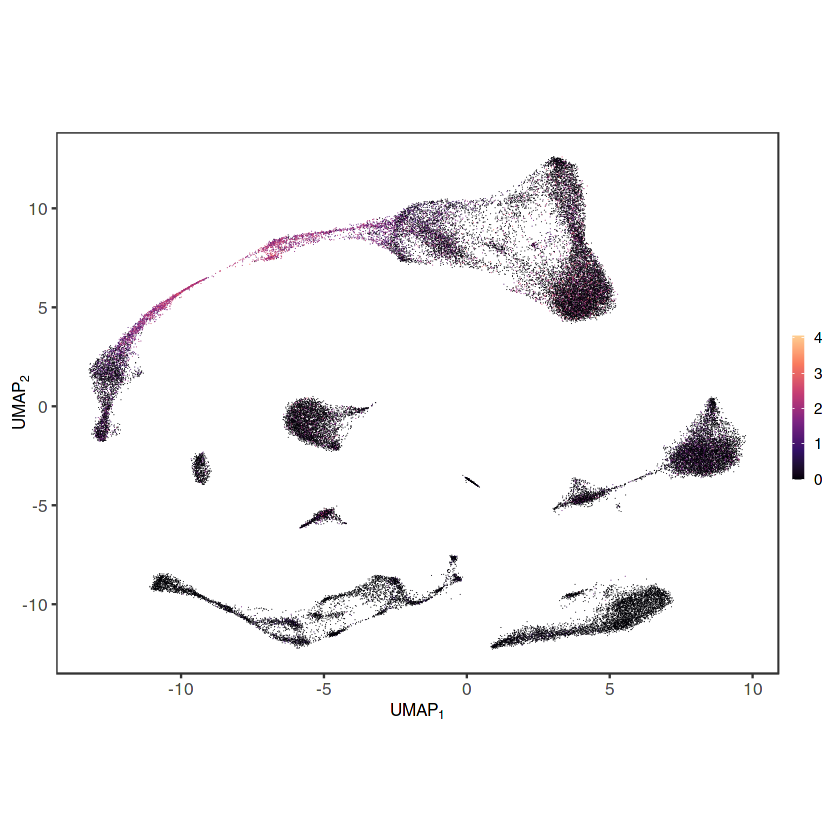

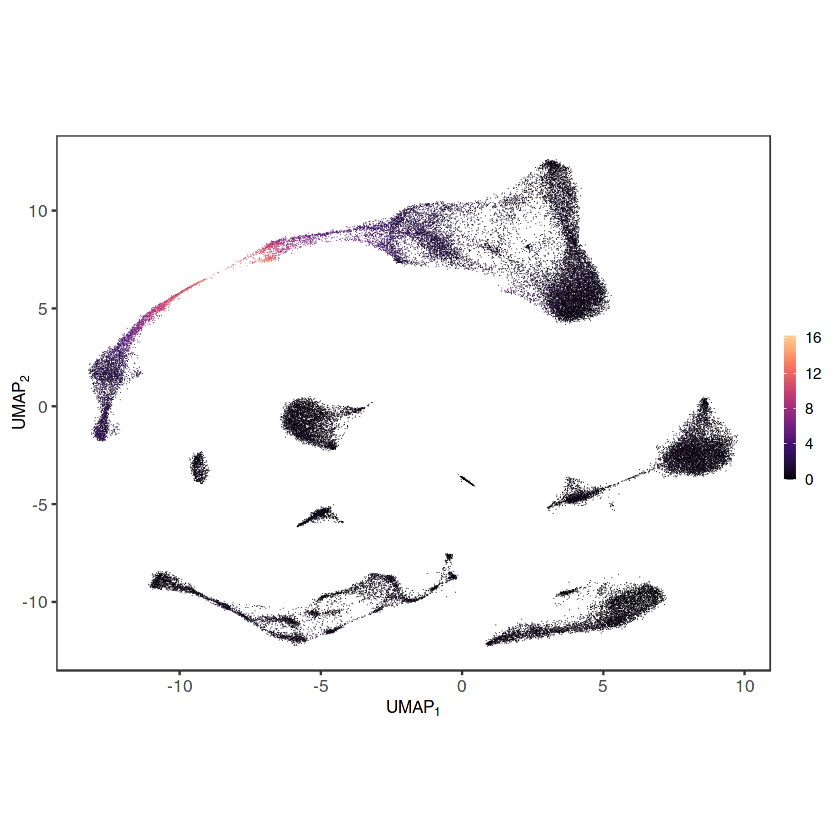

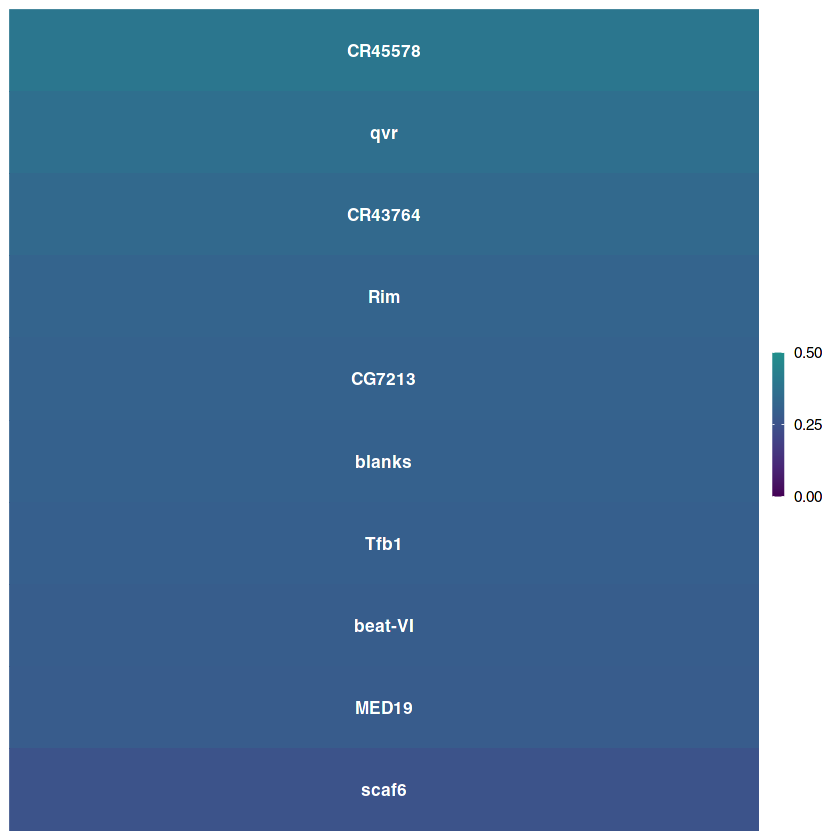

In [11]:
blanksplot <- lnplot
blanksplot$data$Y <- pull(FetchData(testis, "blanks", cells = blanksplot$data$rowname))
print(blanksplot)
grid.newpage()
spcaplot <- lnplot
spcaplot$data$Y <- pull(FetchData(testis, "FEATURE_45", cells = blanksplot$data$rowname)) -
  min(pull(FetchData(testis, "FEATURE_45", cells = Cells(testis) %>% subset(testis$batch == "sample1"))))
print(spcaplot)
grid.newpage()
spca <- testis[["spca"]]
rownames(spca@feature.loadings) <-
  rownames(spca@feature.loadings) %>%
    str_replace("lncRNA:", "")
spc_tile_plot <- function (spca, column, fontface = "bold", option = "viridis", 
    begin = 0, end = 1, fontsize = 4) 
{
    if (begin < 0) {
        y <- c(seq_gradient_pal("#e0524d", viridis(10)[1])(seq(0, 
            1, length.out = abs(round(begin * 100)))[-abs(round(begin * 
            100))]), viridis(101)[1:(1 + round(end * 100))])
        scl <- scale_fill_gradientn(limits = c(begin, end + 1e-10), 
            colors = y, na.value = "#000000")
    }
    else {
        scl <- scale_fill_viridis_c(limits = c(begin, end), breaks = seq(begin, 
            end, length.out = 3), option = option, begin = begin, 
            end = end, na.value = "#000000")
    }
    vals <- spca[, column, drop = T] %>% sort(dec = T) %>% subset(. != 
        0)
    if ("..." %in% rownames(spca@feature.loadings)) 
        vals <- c(vals[vals > 0], ... = NA, vals[vals < 0])
    list(spc.genes = names(vals)) %>% with(data.frame(gene = factor(spc.genes, 
        levels = spc.genes), loading = as.numeric(vals))) %>% 
        ggplot() + geom_tile(aes(x = "", y = gene, fill = loading), 
        color = NA) + geom_text(aes(x = "", y = gene, label = gene), 
        size = fontsize, fontface = fontface, color = "white") + 
        scl + scale_x_discrete(breaks = NULL, expand = c(0, 0)) + 
        scale_y_discrete(breaks = NULL, limits = rev, expand = c(0, 
            0)) + labs(x = NULL, y = NULL) +
        theme(panel.border = element_blank())
}
# Convert fontsize to mm
(FL <- spc_tile_plot(spca, "FEATURE_45", fontsize=10 * 25.4/72, end = 0.5) + guides(fill = guide_colorbar(title = NULL, barwidth = 0.5)))

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


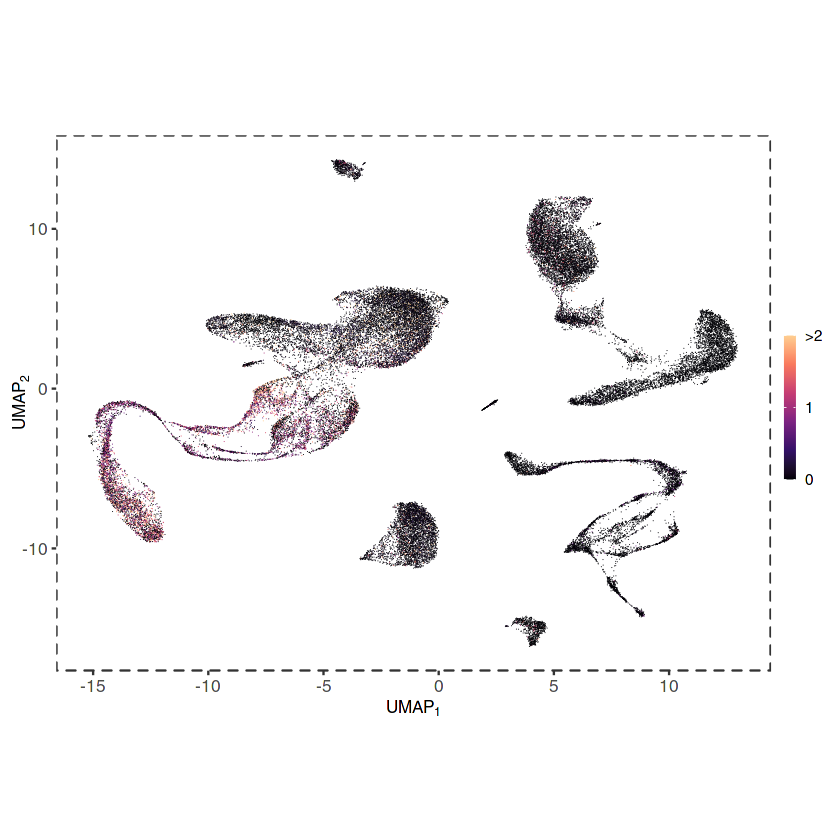

In [189]:
pcaplot <- lnplot + cyca_scale +
  theme(panel.border = element_rect(linetype = "99"))
pcaplot$data[, 2:3] <- FetchData(testis, c("umap.pca_1", "umap.pca_2"), cells = pcaplot$data$rowname)
pcaplot$data$Y <- pmin(pull(FetchData(testis, "CycA", cells = pcaplot$data$rowname)), 2)
pcaplot

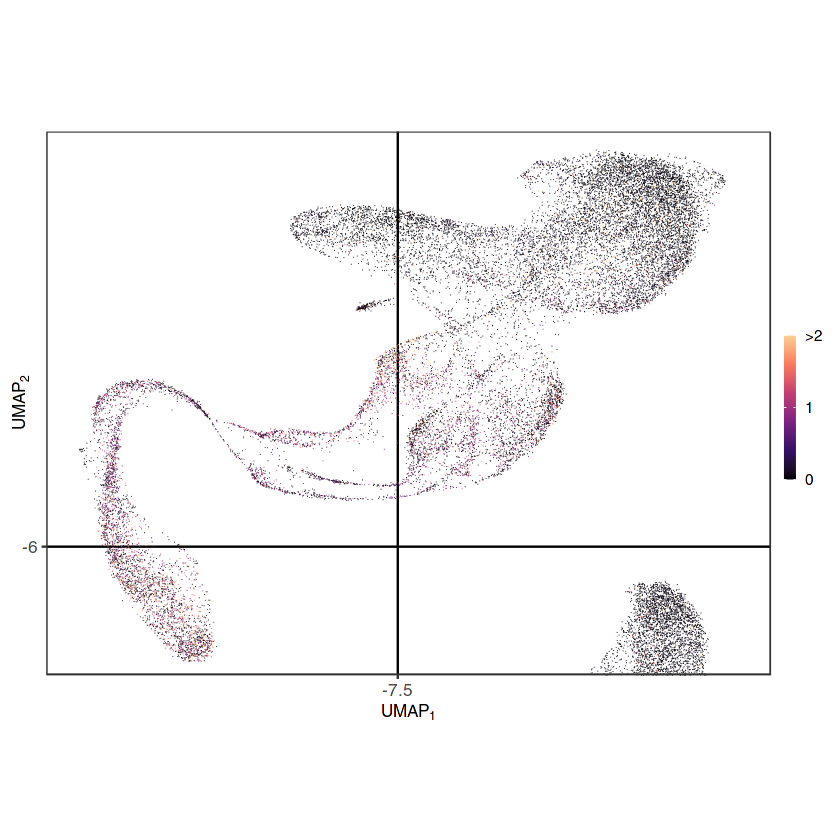

In [41]:
pca.x1 <- -16
pca.x2 <- -7.5
pca.x3 <- 1.5
pca.y1 <- -10
pca.y2 <- -6
pca.y3 <- 7
cells_inset_pca <- subset(
  pcaplot$data,
  (between(UMAP_1, pca.x1, pca.x2) & between(UMAP_2, pca.y1, pca.y3)) |
    (between(UMAP_1, pca.x2, pca.x3) & between(UMAP_2, pca.y2, pca.y3))
)$rowname
pcaplot +
  scale_x_continuous(breaks = pca.x2) +
  scale_y_continuous(breaks = pca.y2) +
  coord_cartesian(c(pca.x1, pca.x3), c(pca.y1, pca.y3), ex=F) +
  theme(panel.grid = element_line())

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


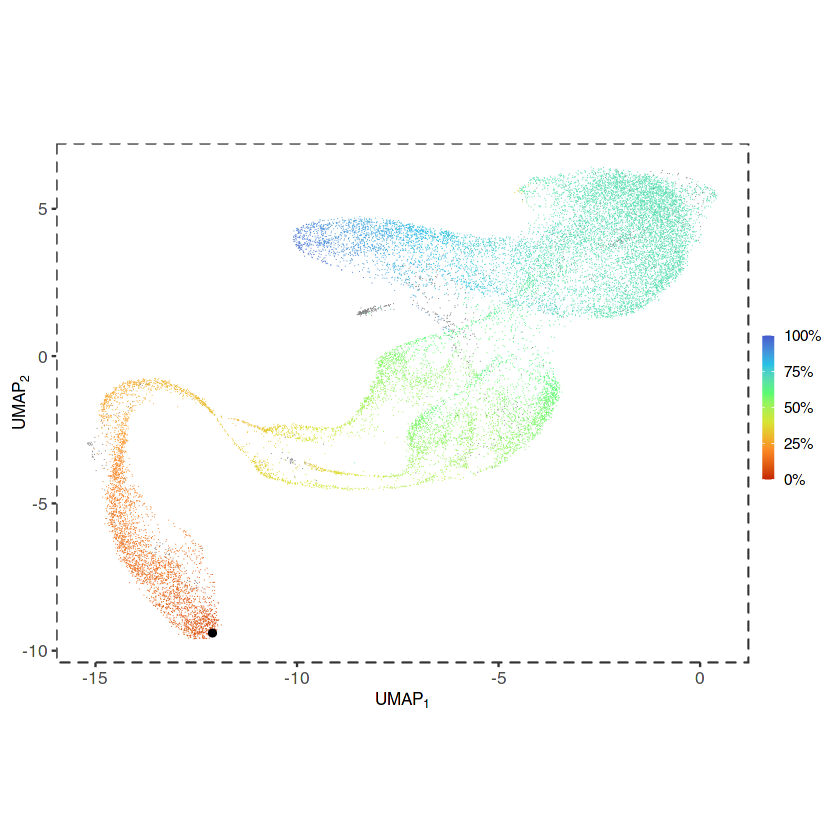

In [188]:
ptplot.pca <- pcaplot +
  scale_fill_viridis_c(option = "turbo", begin = 0.1, end = 0.9, direction = -1, labels = percent) +
  theme(
    panel.border = element_rect(linetype = "99")
  )
ptplot.pca$data$Y <- pull(FetchData(testis, "slingshot.germ", cells = ptplot.pca$data$rowname))
ptplot.pca$data <- ptplot.pca$data[match(cells_inset_pca, ptplot.pca$data$rowname), ]
ptplot.pca +
  annotate(
    "point",
    ptplot.pca$data$UMAP_1[which.min(ptplot.pca$data$Y)],
    ptplot.pca$data$UMAP_2[which.min(ptplot.pca$data$Y)]
  )

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


Warning message:
“Could not find bam in the default search locations, found in RNA assay instead”


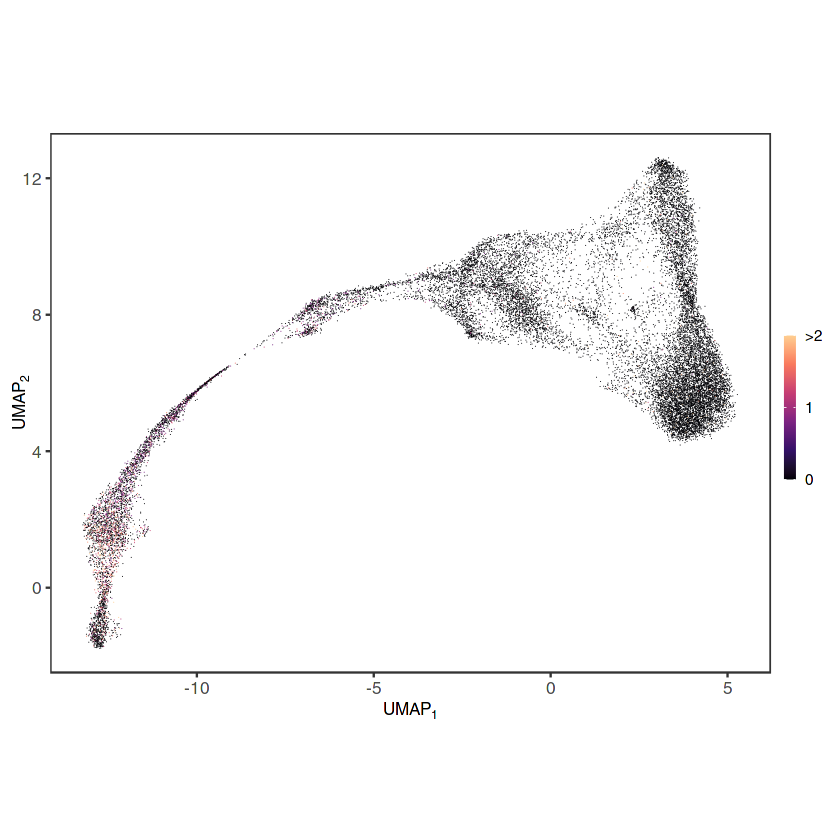

In [ ]:
bamplot <- lnplot + cyca_scale
bamplot$data$Y <- pmin(pull(FetchData(testis, "bam", cells = bamplot$data$rowname)), 2)
bamplot$data <- bamplot$data[match(cells_inset, bamplot$data$rowname), ]
bamplot

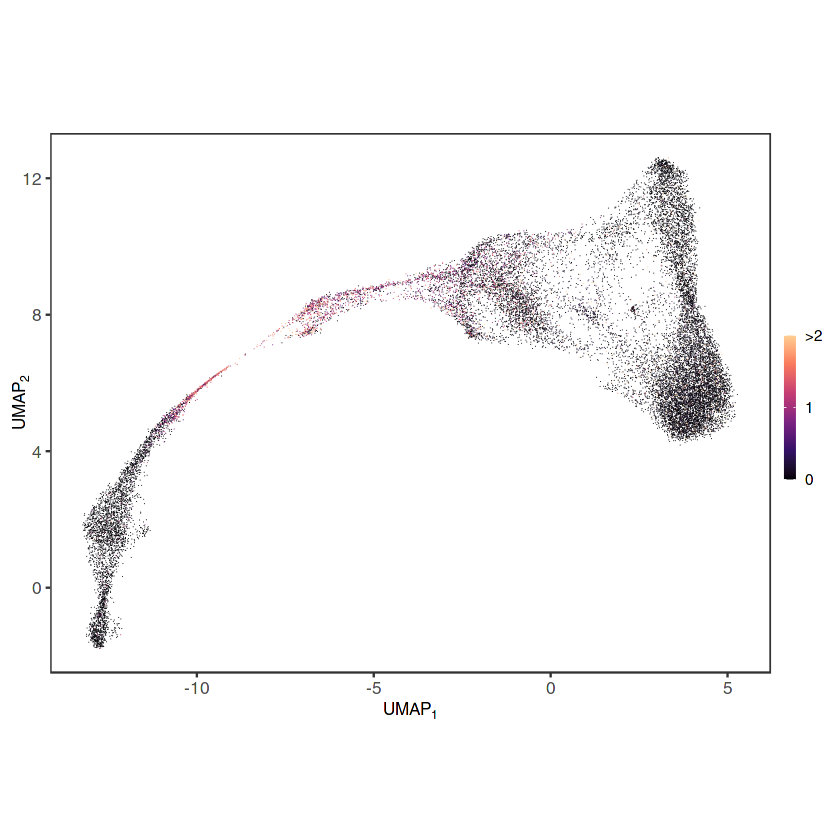

In [68]:
canplot <- bamplot
canplot$data$Y <- pmin(pull(FetchData(testis, "can", cells = canplot$data$rowname)), 2)
canplot$data <- canplot$data[match(cells_inset, canplot$data$rowname), ]
canplot

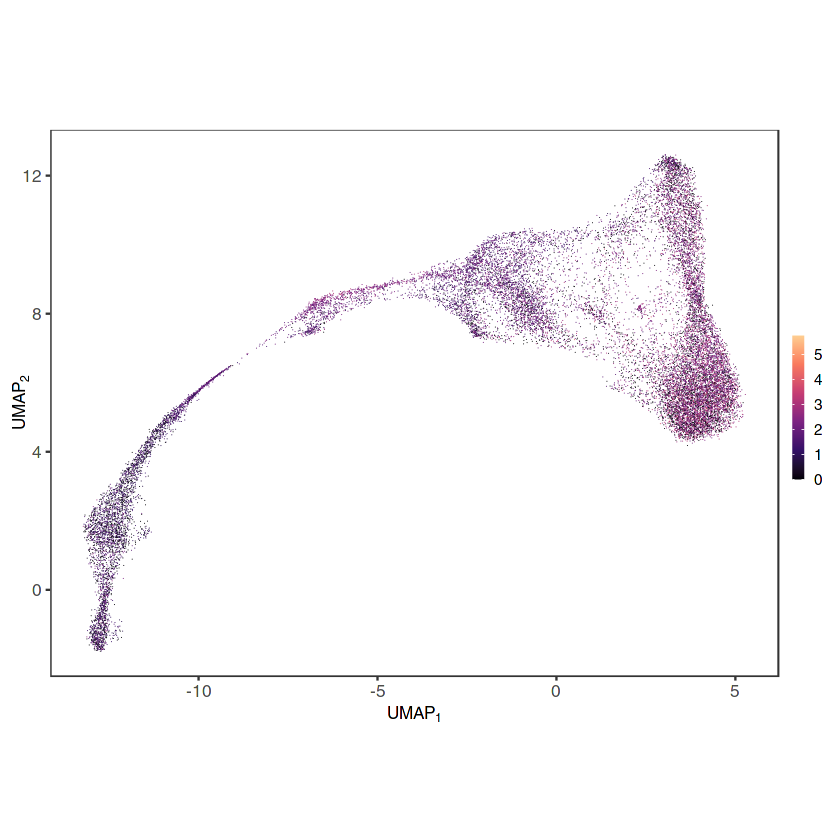

In [70]:
exuplot <- lnplot
exuplot$data$Y <- pull(FetchData(testis, "exu", cells = exuplot$data$rowname))
exuplot$data <- exuplot$data[match(cells_inset, exuplot$data$rowname), ]
exuplot

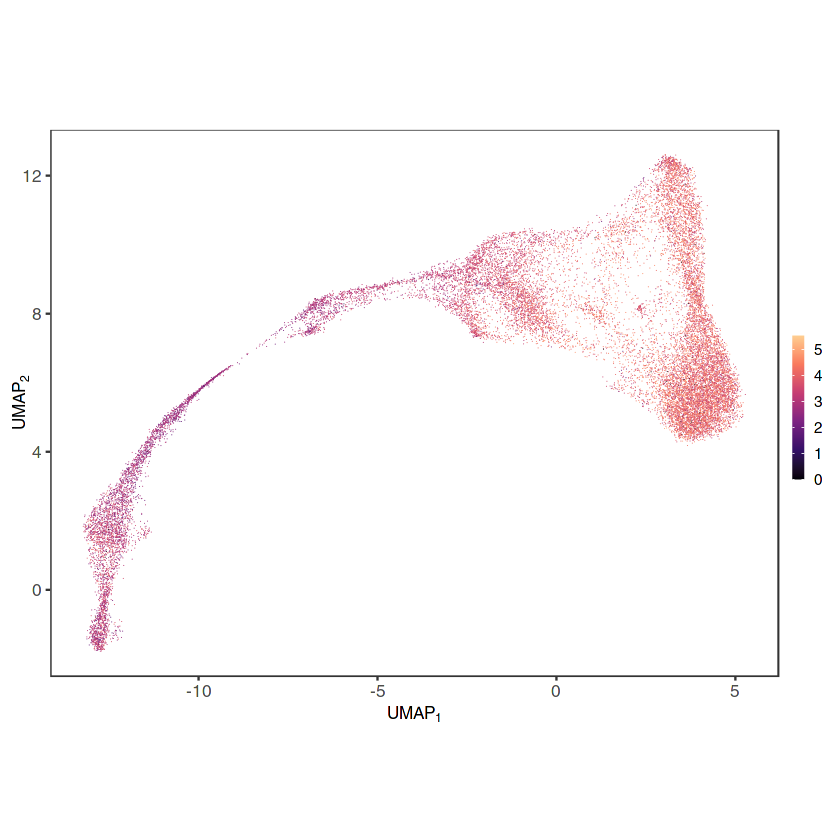

In [72]:
mstplot <- lnplot
mstplot$data$Y <- pull(FetchData(testis, "rna_Mst84Da", cells = mstplot$data$rowname))
mstplot$data <- mstplot$data[match(cells_inset, mstplot$data$rowname), ]
mstplot

In [186]:
genes_plot <- c("bam", "blanks", "CycA", "exu", "Mst84Da")
features <- FetchData(testis, c("slingshot.germ", genes_plot)) %>%
  summarise(
    x = seq(0, 1, by=0.01),
    across(
      !c(x, slingshot.germ),
      \(v) predict(
        loess(v ~ slingshot.germ, span = 0.25),
        newdata = x
      ) %>%
        pmax(0)
    )
  ) %>%
  print()

Warning message:
“Could not find bam in the default search locations, found in RNA assay instead”
Warning message:
“Could not find Mst84Da in the default search locations, found in RNA assay instead”


       x     rna_bam      blanks       CycA       exu rna_Mst84Da
1   0.00 0.478070164 0.000000000 0.93025226 1.6381766    3.264627
2   0.01 0.483065919 0.000000000 0.91256684 1.5482579    3.250672
3   0.02 0.487539881 0.000000000 0.89538459 1.4640412    3.237663
4   0.03 0.491355221 0.000000000 0.87859361 1.3855674    3.225141
5   0.04 0.494375116 0.000000000 0.86208202 1.3128778    3.212644
6   0.05 0.496462739 0.000000000 0.84573795 1.2460132    3.199713
7   0.06 0.497481265 0.036445531 0.82944951 1.1850149    3.185887
8   0.07 0.497293867 0.100406802 0.81310480 1.1299238    3.170705
9   0.08 0.495763720 0.168993800 0.79659196 1.0807811    3.153707
10  0.09 0.492753998 0.243121732 0.77979909 1.0376278    3.134433
11  0.10 0.488207446 0.323171024 0.76267701 1.0004858    3.112697
12  0.11 0.482732985 0.405107101 0.74570485 0.9692259    3.090578
13  0.12 0.476489719 0.488033270 0.72901354 0.9438431    3.068498
14  0.13 0.469445323 0.572471797 0.71256595 0.9244492    3.046179
15  0.14 0

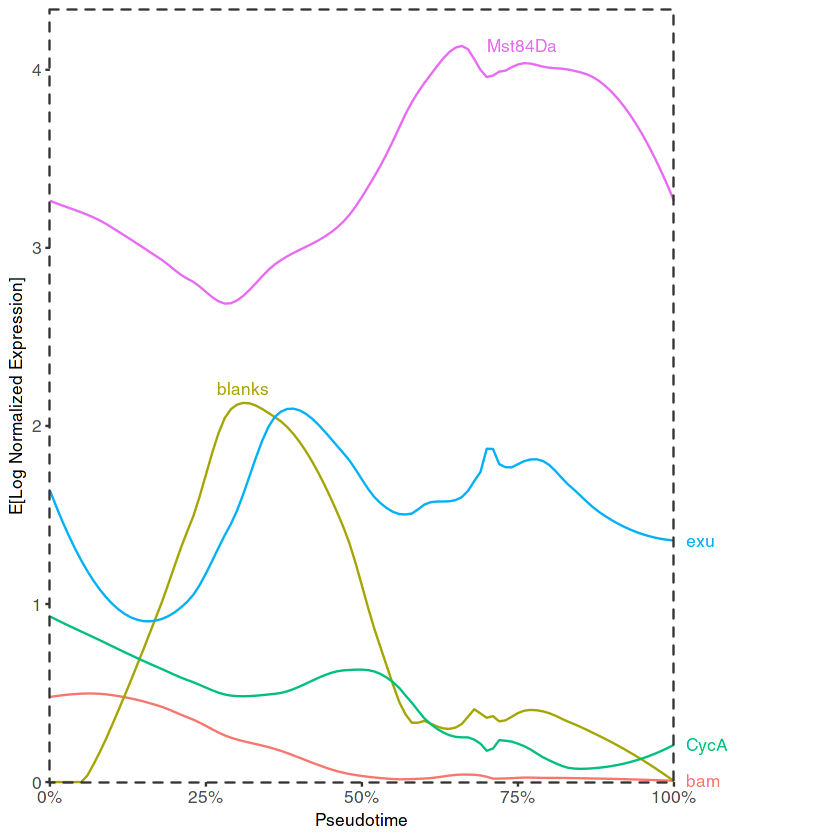

In [187]:
invisible(
  geneLoess <-
    ggplot(
      melt(features, id.vars="x"),
      aes(x, value, color=variable)
    ) +
      geom_line() +
      scale_color_hue("Gene") +
      scale_x_continuous(labels = percent) +
      coord_cartesian(c(0, 1), y=c(0, 1.05 * max(unlist(features[-1]))), expand=F, clip="off") +
      labs(x = "Pseudotime", y = "E[Log Normalized Expression]") +
      theme(legend.position = "none", plot.margin = margin(5.5, 100, 5.5, 5.5))
)
gene_colors <- hue_pal()(5)
gene_x <- rep(1.02, 5)
hjust <- rep(0, 5)
gene_y <- unlist(tail(features[-1], 1))
gene_x[genes_plot == "blanks"] <- features$x[which.max(features$blanks)]
gene_y[genes_plot == "blanks"] <- max(features$blanks) + 0.08
hjust[genes_plot == "blanks"] <- 0.5
gene_x[genes_plot == "Mst84Da"] <- features$x[which.max(features$rna_Mst84Da)] + 0.04
gene_y[genes_plot == "Mst84Da"] <- max(features$rna_Mst84Da)
(
  geneLoess <-
    (line_plot <- geneLoess) +
      theme(panel.border = element_rect(linetype = "99")) +
      annotate(
        "text",
        gene_x,
        gene_y,
        label = genes_plot,
        hjust = hjust,
        color = gene_colors,
        size = 10 * 25.4 / 72
      )
)

[1] 0.130 0.545 0.695

[1] 1.00 1.57 3.99

[1] 0.175 0.515 0.655

[1] 1.00 1.66 3.74

Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.


Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.


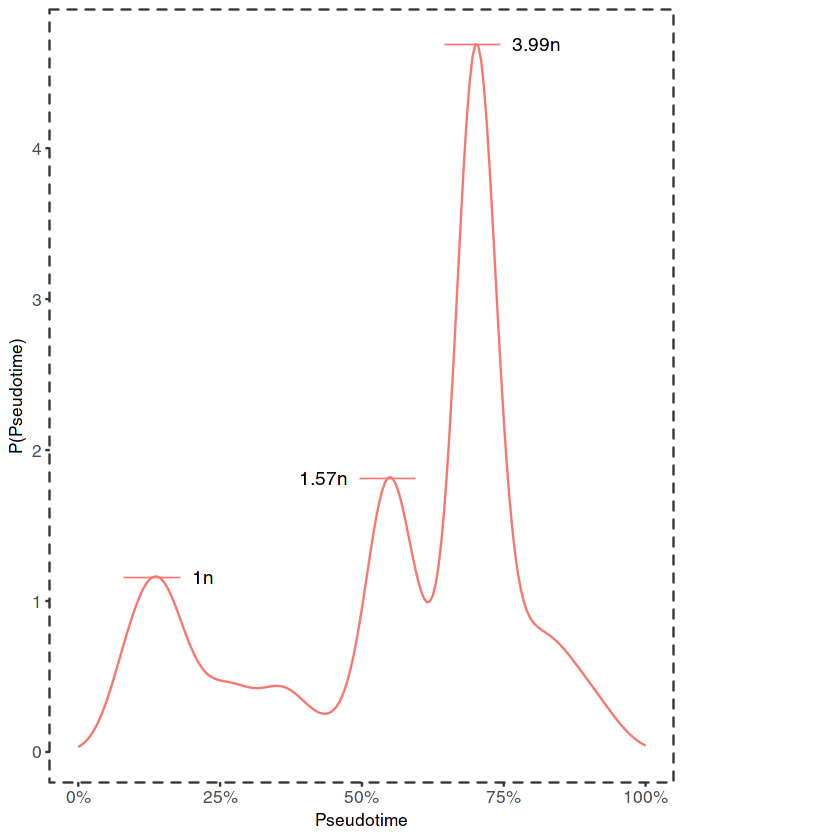

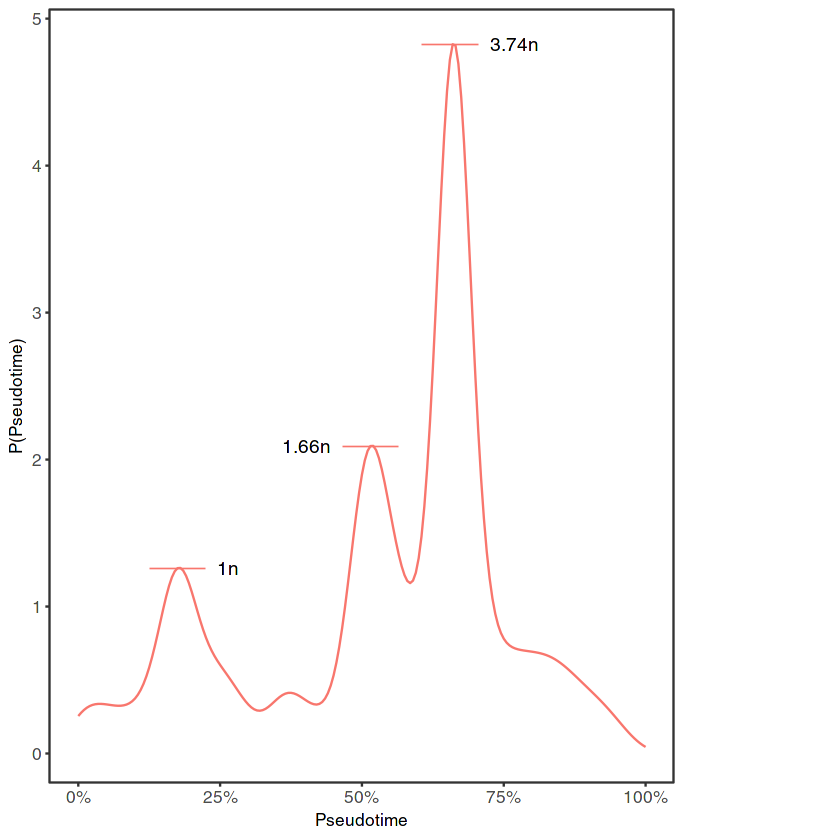

In [179]:
dens.fit.pca <- density(testis$slingshot.germ %>% subset(!is.na(.)), from = 0, to = 1, n = 201, adjust = 1.5)
dens.fit.spca <- density(testis$slingshot.germ.spca %>% subset(!is.na(.)), from = 0, to = 1, n = 201, adjust = 1.5)
(dens.annot.pca <- dens.fit.pca$x[diff(sign(diff(dens.fit.pca$y))) == -2][c(1, 3, 4)])
round(dens.fit.pca$y[match(dens.annot.pca, dens.fit.pca$x)] %>% `/`(head(., 1)), 2)
(dens.annot.spca <- dens.fit.spca$x[diff(sign(diff(dens.fit.spca$y))) == -2][c(2, 4, 5)])
round(dens.fit.spca$y[match(dens.annot.spca, dens.fit.spca$x)] %>% `/`(head(., 1)), 2)

ptDensity_pca_supp <- line_plot +
  coord_cartesian(y=c(0, 1.05 * max(dens.fit$y)), expand=F) +
  labs(y = "P(Pseudotime)") +
  annotate(
    "tile",
    dens.annot.pca,
    dens.fit.pca$y[match(dens.annot.pca, dens.fit.pca$x)] %>% replace(3, max(dens.fit.pca$y)),
    width = 0.1,
    height = 0,
    fill = "transparent",
    color = hue_pal()(2)[1],
    linewidth = 25.4 / 72
  ) +
  annotate(
    "text",
    dens.annot.pca + c(1, -1, 1) * 0.07,
    dens.fit.pca$y[match(dens.annot.pca, dens.fit.pca$x)] %>% replace(3, max(dens.fit.pca$y)),
    hjust = c(0, 1, 0),
    label = paste0(round(dens.fit.pca$y[match(dens.annot.pca, dens.fit.pca$x)] %>% `/`(head(., 1)), 2), "n")
  ) +
  coord_cartesian(clip = "off") +
  theme(
    panel.border = element_rect(linetype = "99")
  )
ptDensity_pca_supp$data <- tibble(
  with(
    dens.fit.pca[c("x", "y")],
    tibble(x, variable = "density", value = y)
  )
)
ptDensity_pca_supp

grid.newpage()
ptDensity_spca_supp <- line_plot +
  coord_cartesian(y=c(0, 1.05 * max(dens.fit$y)), expand=F) +
  labs(y = "P(Pseudotime)") +
  annotate(
    "tile",
    dens.annot.spca,
    dens.fit.spca$y[match(dens.annot.spca, dens.fit.spca$x)] %>% replace(3, max(dens.fit.spca$y)),
    width = 0.1,
    height = 0,
    fill = "transparent",
    color = hue_pal()(2)[1],
    linewidth = 25.4 / 72
  ) +
  annotate(
    "text",
    dens.annot.spca + c(1, -1, 1) * 0.07,
    dens.fit.spca$y[match(dens.annot.spca, dens.fit.spca$x)] %>% replace(3, max(dens.fit.spca$y)),
    hjust = c(0, 1, 0),
    label = paste0(round(dens.fit.spca$y[match(dens.annot.spca, dens.fit.spca$x)] %>% `/`(head(., 1)), 2), "n")
  ) +
  coord_cartesian(clip = "off")
ptDensity_spca_supp$data <- tibble(
  with(
    dens.fit.spca[c("x", "y")],
    tibble(x, variable = "density", value = y)
  )
)
ptDensity_spca_supp

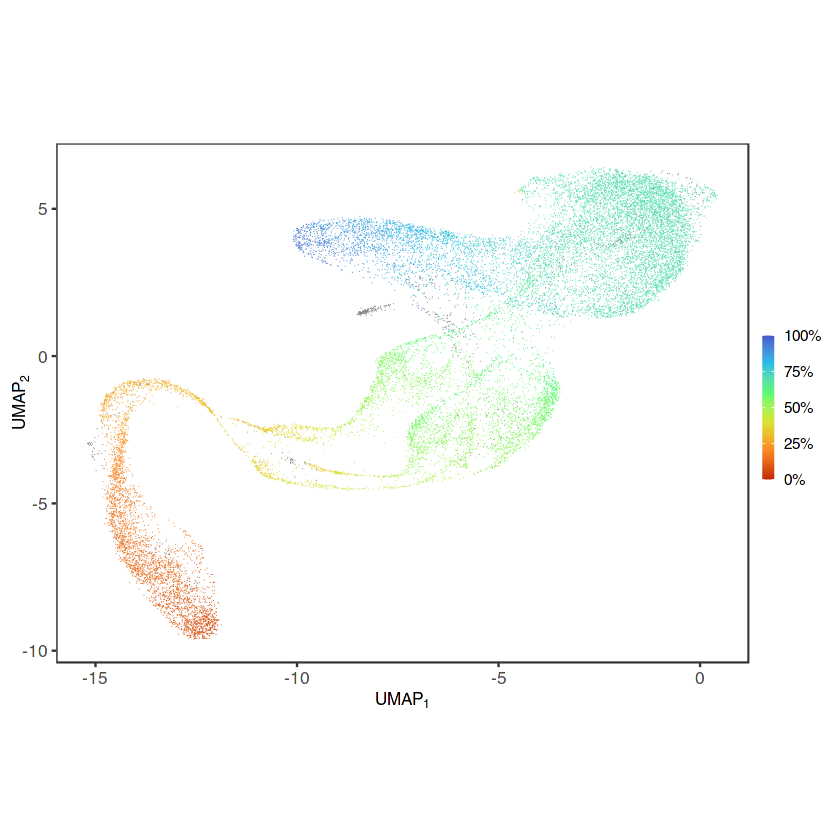

In [128]:
grid.draw(ptplot.pca)

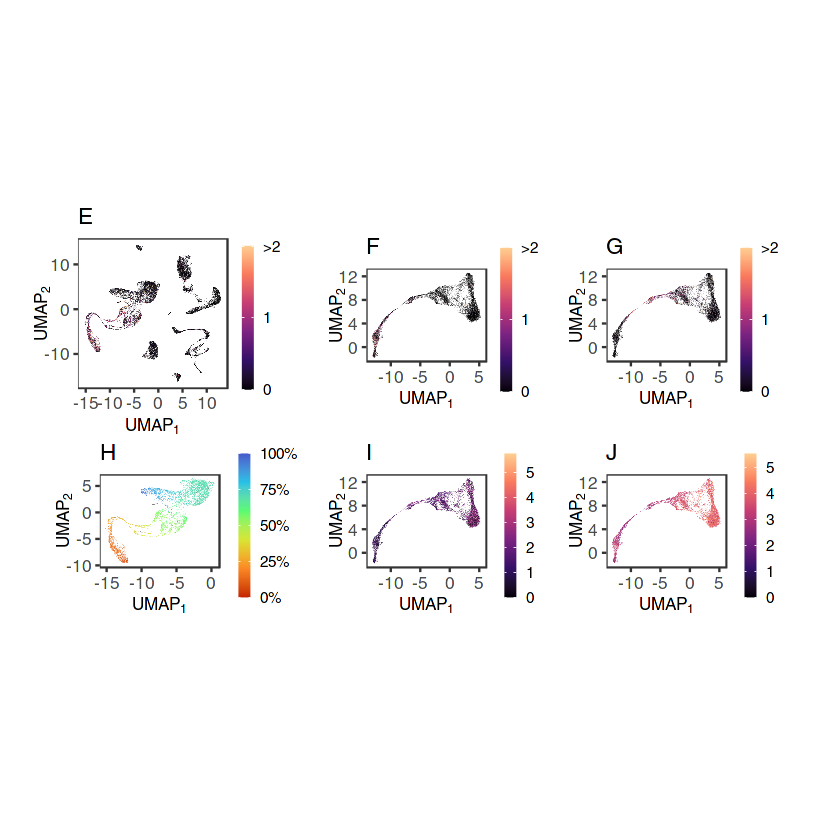

In [180]:
library(ggrastr)
grid.draw(
  suppDetailPanel <- rbind(
          cbind(
            set_panel_size(
              ggplot(data.frame(x=0, y=0, color="a"), aes(x, y, color=color)) +
                geom_point(alpha=0) +
                theme_void() +
                theme(plot.margin = margin(5.5, 5.5, 23.5, 5.5), legend.text = element_blank()),
              w = width.inset, h = height.inset),
            set_panel_size(rasterise(bamplot, dpi=600) + labs(title = "F"), w = width.inset, h = height.inset),
            set_panel_size(rasterise(canplot, dpi=600) + labs(title = "G"), w = width.inset, h = height.inset)
          ),
          cbind(
            set_panel_size(rasterise(ptplot.pca, dpi=600) + labs(title = "H"), w = width.inset, h = height.inset),
            set_panel_size(rasterise(exuplot, dpi=600) + labs(title = "I"), w = width.inset, h = height.inset),
            set_panel_size(rasterise(mstplot, dpi=600) + labs(title = "J"), w = width.inset, h = height.inset)
          )
        ) %>%
          gtable_add_grob(
            set_panel_size(rasterise(pcaplot, dpi=600) + labs(title = "E"), w = unit(1.25, "in"), h = unit(1.25, "in")),
            t = 7,
            l = 5
          )
)

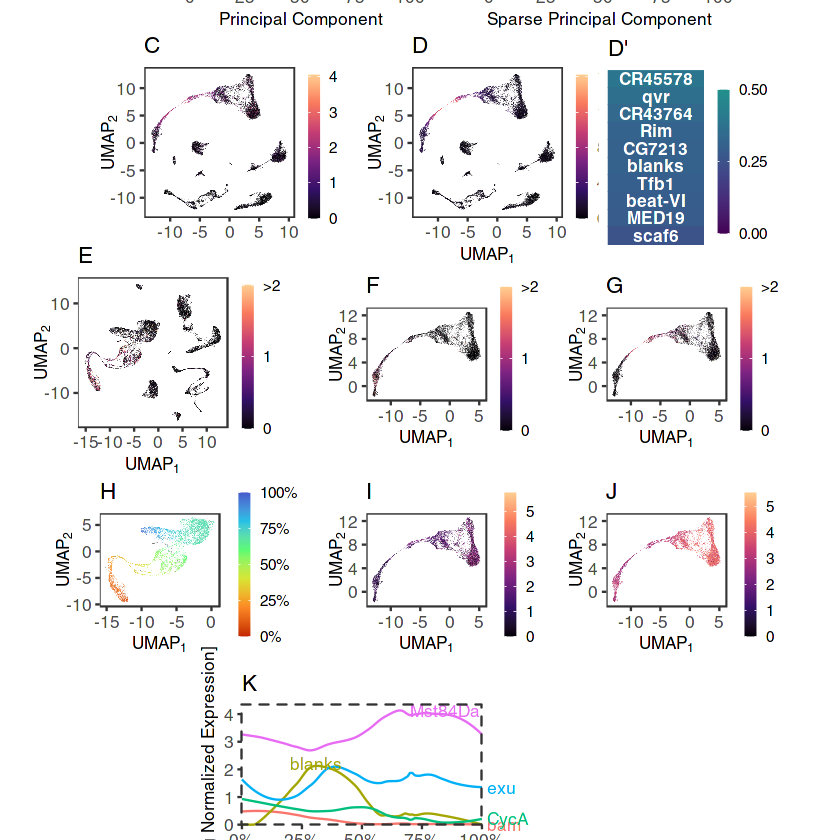

In [193]:
width.inset <- unit(1, "in")
height.inset <- unit(7/9, "in")
grid.draw(
  supp <- gtable(
    w = unit(1, "null"),
    h = unit(c(1.5, 0.15, 1.75, 3.5, 1.75, 1), "in")
  ) %>%
    gtable_add_grob(
      list(
        elbow,
        cbind(
          set_panel_size(rasterise(blanksplot, dpi=600) + labs(title = "C"), w = unit(1.25, "in"), h = unit(1.25, "in")),
          set_panel_size(rasterise(spcaplot, dpi=600) + labs(title = "D"), w = unit(1.25, "in"), h = unit(1.25, "in")),
          set_panel_size(ggplot() + theme_void(), w = unit(1, "in"), h = unit(1.25, "in"))
        ) %>%
          gtable_add_grob(
            set_panel_size(FL + labs(title = "D'"), w = unit(0.8, "in"), h = unit(1.45, "in")),
            t = 7,
            l = 27
          ),
        suppDetailPanel,
        set_panel_size(
          geneLoess + labs(title = "K"),
          w = unit(2, "in"),
          h = unit(1, "in")
        ),
        cbind(
          set_panel_size(
            ptDensity_pca_supp + labs(title = "L"),
            w = unit(2, "in"),
            h = unit(0.75, "in")
          ),
          set_panel_size(
            ptDensity_spca_supp + labs(title = "M"),
            w = unit(2, "in"),
            h = unit(0.75, "in")
          )
        )
      ),
      t = c(1, 3:6),
      l = 1
    )
)

In [194]:
ggsave("FigS6.pdf", supp, w=7.5, h=10)

In [62]:
cells_take <- cyca$data$rowname
(
  score <-
    testis[["spca"]]@cell.embeddings[cells_take, 1:60] %>%
      as_tibble() %>%
      group_by(x = structure(cut(pull(FetchData(testis, "slingshot.germ.spca", cells=cells_take)), seq(0, 1, by = 0.02) %>% replace(1, -Inf)), class = "factor", levels = as.character(seq(0.01, 0.99, by = 0.02)))) %>%
      summarise(across(everything(), mean)) %>%
      subset(!is.na(x)) %>%
      mutate(x = as.numeric(as.character(x))) %>%
      print(n = 100)
)
score[2:61] <- mapply(
  \(v, values) v - min(values),
  score[2:61],
  apply(testis[["spca"]]@cell.embeddings[pull(FetchData(testis, "batch", cells=cells_take)) == "sample1", 1:60], 2, identity, simplify=FALSE),
  SIMPLIFY=FALSE
)

# A tibble: 50 × 61
       x FEATURE_1 FEATURE_2 FEATURE_3 FEATUR…¹ FEATU…² FEATU…³ FEATUR…⁴ FEATU…⁵
   <dbl>     <dbl>     <dbl>     <dbl>    <dbl>   <dbl>   <dbl>    <dbl>   <dbl>
 1  0.01     -2.11     -1.69    -0.617    2.50    -1.56 -0.315   1.45     -1.63 
 2  0.03     -2.13     -1.73    -0.649    2.47    -1.65 -0.401   1.39     -1.61 
 3  0.05     -2.13     -1.72    -0.601    2.49    -1.59 -0.336   1.42     -1.61 
 4  0.07     -2.17     -1.76    -0.584    2.27    -1.67 -0.386   1.25     -1.61 
 5  0.09     -2.24     -1.78    -0.699    2.34    -1.79 -0.369   1.15     -1.62 
 6  0.11     -2.33     -1.75    -0.699    2.34    -1.76 -0.360   1.28     -1.58 
 7  0.13     -2.35     -1.76    -0.728    2.41    -1.85 -0.326   1.11     -1.60 
 8  0.15     -2.38     -1.88    -0.669    2.63    -2.00 -0.361   1.01     -1.53 
 9  0.17     -2.40     -1.96    -0.633    2.86    -2.14 -0.340   1.34     -1.53 
10  0.19     -2.41     -1.93    -0.685    2.88    -2.19 -0.332   1.89     -1.53 
11  0.21

x    FEATURE_1 FEATURE_2 FEATURE_3  FEATURE_4  FEATURE_5 FEATURE_6  
1  0.01 -2.112226 -1.688426 -0.6171005  2.4971996 -1.558009 -0.31473838
2  0.03 -2.129750 -1.729041 -0.6486097  2.4730719 -1.646012 -0.40056175
3  0.05 -2.128671 -1.717394 -0.6005940  2.4912095 -1.588127 -0.33571237
4  0.07 -2.173333 -1.758098 -0.5839852  2.2710642 -1.674112 -0.38620349
5  0.09 -2.241611 -1.780846 -0.6994623  2.3380465 -1.789811 -0.36943012
6  0.11 -2.328851 -1.753821 -0.6991534  2.3443984 -1.755778 -0.36013560
7  0.13 -2.353447 -1.764605 -0.7277241  2.4133912 -1.854800 -0.32587807
8  0.15 -2.383408 -1.882558 -0.6691041  2.6269800 -2.003704 -0.36102215
9  0.17 -2.403629 -1.959988 -0.6328120  2.8553660 -2.137348 -0.33966978
10 0.19 -2.405328 -1.929205 -0.6845209  2.8793979 -2.188213 -0.33226809
11 0.21 -2.418332 -1.878150 -0.7434234  2.9583143 -2.171276 -0.29148866
12 0.23 -2.390174 -1.839627 -0.8323339  2.8718476 -2.195983 -0.36924115
13 0.25 -2.400524 -1.801603 -0.8977438  2.7778003 -2.187719 -0.40465041
14 0.27 -2.402818 -1.704587 -0.9549122  2.4981304 -2.120091 -0.44647778
15 0.29 -2.459108 -1.726106 -0.9307728  1.9385984 -2.175729 -0.46696926
16 0.31 -2.561697 -1.768405 -0.9695474  0.8836091 -2.273426 -0.32598871
17 0.33 -2.759585 -1.907783 -0.9942381 -0.3662873 -2.495015 -0.41761097
18 0.35 -2.935430 -2.013496 -0.9933033 -1.2197244 -2.574585 -0.46909147
19 0.37 -2.962370 -2.058745 -0.8696092 -1.5045096 -2.558613 -0.42227133
20 0.39 -2.913812 -2.029038 -0.8160196 -1.6799640 -2.527830 -0.32066735
21 0.41 -2.822096 -1.971688 -0.7457112 -1.7237709 -2.456697 -0.42688779
22 0.43 -2.806757 -1.930101 -0.7095151 -1.8711878 -2.465101 -0.44029547
23 0.45 -2.730644 -1.883509 -0.6548237 -1.9591915 -2.444936 -0.36128407
24 0.47 -2.736109 -1.812943 -0.4511098 -2.0887951 -2.420286 -0.22492161
25 0.49 -2.867806 -1.924345 -0.2074509 -2.4555459 -2.409227  0.11167277
26 0.51 -2.945747 -1.997446 -0.3347164 -2.8500022 -2.395416  0.23676512
27 0.53 -2.971278 -2.020647 -0.4615035 -3.0798652 -2.456141  0.14131671
28 0.55 -2.987606 -2.043378 -0.4816725 -3.1560528 -2.474581  0.04097277
29 0.57 -2.987822 -2.079316 -0.6017700 -3.2425365 -2.493855 -0.06096333
30 0.59 -3.011370 -2.153633 -0.6878218 -3.2619983 -2.540067 -0.17097810
31 0.61 -3.022140 -2.154193 -0.7452366 -3.1890597 -2.536016 -0.18128614
32 0.63 -3.017087 -2.174572 -0.8257425 -3.2941147 -2.558056 -0.22153409
33 0.65 -3.007213 -2.178067 -0.8592531 -3.4053283 -2.558738 -0.23088201
34 0.67 -3.005341 -2.166502 -0.8819291 -3.4602020 -2.545012 -0.25141160
35 0.69 -3.016127 -2.153388 -0.8723484 -3.4533579 -2.541958 -0.23946814
36 0.71 -3.005559 -2.138806 -0.8420090 -3.4304196 -2.537654 -0.31482258
37 0.73 -2.979339 -2.137828 -0.8019743 -3.3138306 -2.511397 -0.26476029
38 0.75 -2.998706 -2.139384 -0.8473088 -3.3556901 -2.524374 -0.29019946
39 0.77 -2.995580 -2.133721 -0.8629459 -3.3466575 -2.520622 -0.30649190
40 0.79 -2.997687 -2.136973 -0.8571555 -3.3594727 -2.525366 -0.30023884
41 0.81 -3.005769 -2.124123 -0.8521380 -3.3432733 -2.503887 -0.23581615
42 0.83 -3.006310 -2.121499 -0.8622981 -3.4440071 -2.510562 -0.24779576
43 0.85 -3.006297 -2.135831 -0.8473929 -3.4510956 -2.502312 -0.30814058
44 0.87 -3.000793 -2.118264 -0.8357758 -3.4909197 -2.517129 -0.36635716
45 0.89 -2.994939 -2.114828 -0.8602192 -3.5016445 -2.519853 -0.40883414
46 0.91 -2.985119 -2.106104 -0.8493292 -3.5557088 -2.487445 -0.38534799
47 0.93 -2.990494 -2.098679 -0.8361252 -3.4959385 -2.525786 -0.33310139
48 0.95 -2.977018 -2.087750 -0.7823537 -3.4697753 -2.483325 -0.32279063
49 0.97 -2.958911 -2.049331 -0.8606289 -3.5040674 -2.466742 -0.41557650
50 0.99 -2.989161 -2.160684 -0.9317759 -3.6570138 -2.460209 -0.33913918
   FEATURE_7    FEATURE_8  FEATURE_9  ⋯ FEATURE_51   FEATURE_52 FEATURE_53
1   1.452319218 -1.6338437  5.3296901 ⋯ -0.003953560  1.6803266 -0.9427048
2   1.394178611 -1.6147310  5.1866207 ⋯ -0.104085278  1.5770644 -0.9700883
3   1.422210980 -1.6130223  5.0491953 ⋯ -0.116557731  1.5810858 -0.9391673
4   1.248646262 -1.6098140  4.6

In [64]:
which.max(unlist(score[which(score$x == 0.37), -1]))

FEATURE_45 
        45

In [65]:
which.max(unlist(score[which(score$x == 0.63), -1]))

FEATURE_44 
        44

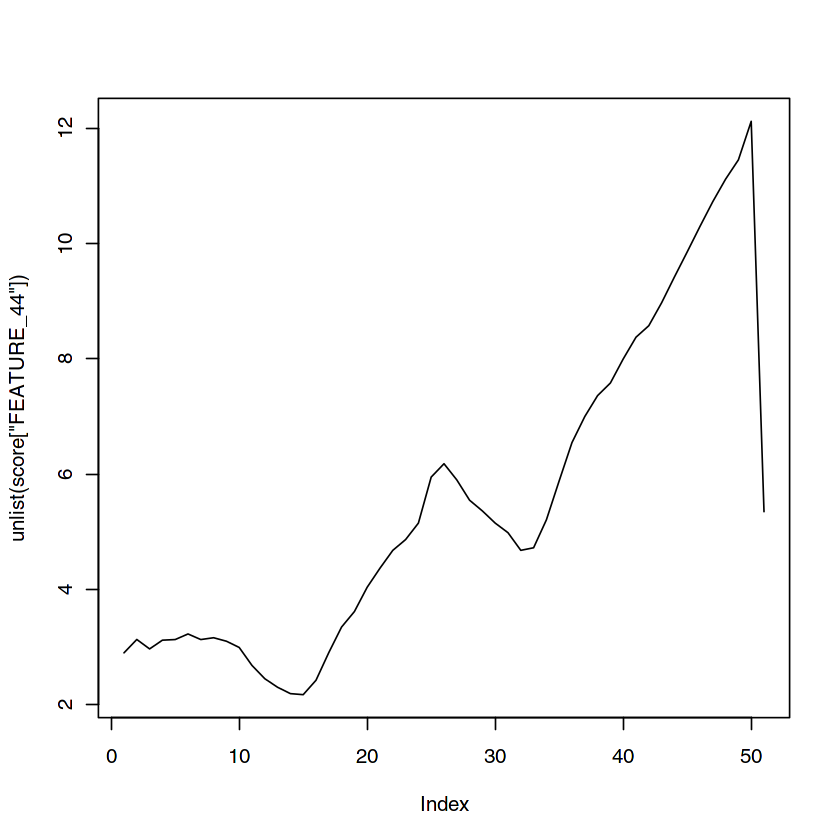

In [109]:
plot(unlist(score["FEATURE_44"]), type='l')

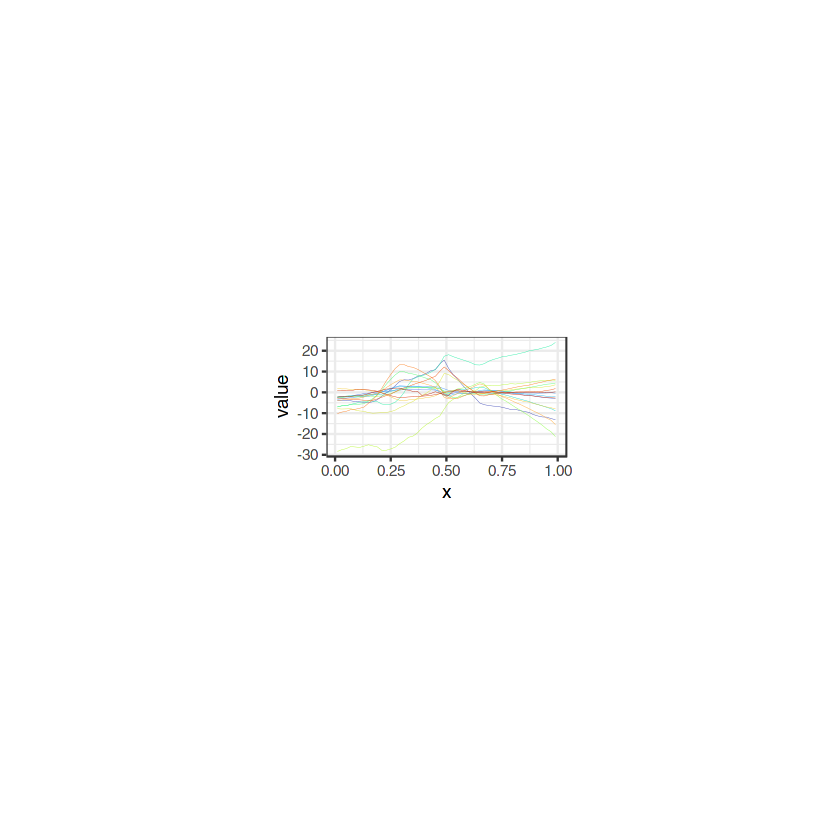

In [129]:
library(reshape2)
library(withr)
# score[seq(ncol(score)) == 1 | sapply(score, max) >= 4] %>%
grid.draw(
  set_panel_size(
    spca_embedding_plot <- score[c(1, with_seed(2, sample(seq(2, ncol(score)))))] %>%
        summarise(x, across(-x, \(v) v * -sign(cor(v, (x - 0.5)^2)))) %>%
      melt(id.var="x") %>%
      tibble(stdev = testis[["spca"]]@stdev[variable]) %>%
      ggplot(aes(x, value, color=variable, group=variable)) +
      geom_line(linewidth = 0.25 * 25.4 / 72) +
      scale_color_viridis_d(option = "turbo", begin = 0.08, end = 0.92) +
      theme_bw() +
      theme(legend.position = "none")
      ,
    w = unit(2, "in"),
    h = unit(1, "in")
  )
)

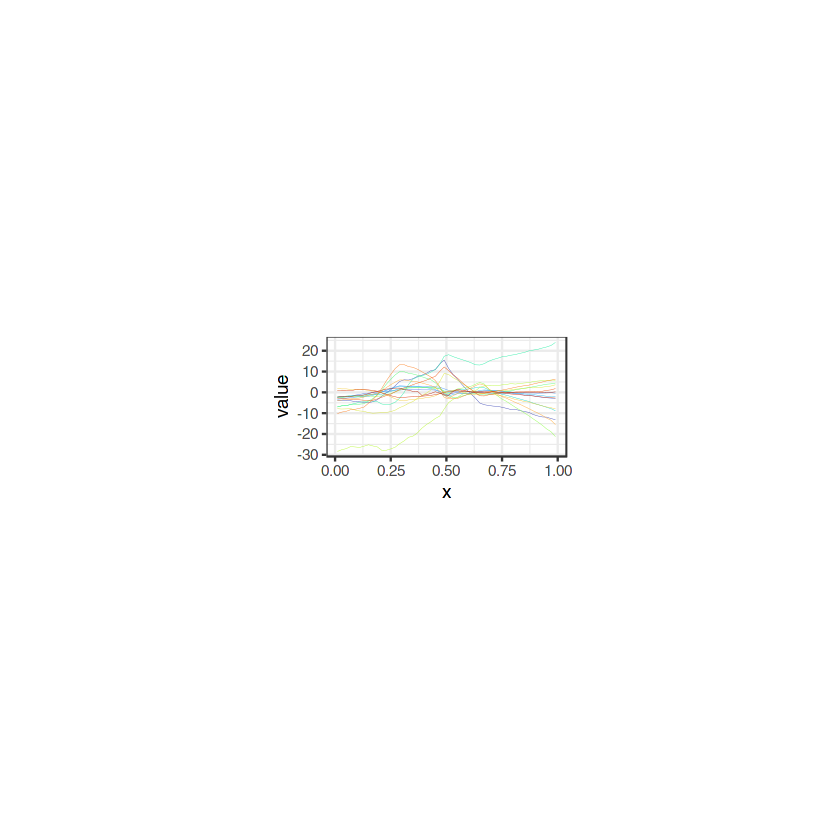

In [130]:
score <-
  testis[["pca"]]@cell.embeddings[cells_take, 1:16] %>%
    as_tibble() %>%
    group_by(x = structure(cut(pull(FetchData(testis, "slingshot.germ.spca", cells=cells_take)), seq(0, 1, by = 0.02) %>% replace(1, -Inf)), class = "factor", levels = as.character(seq(0.01, 0.99, by = 0.02)))) %>%
    summarise(across(everything(), mean)) %>%
    subset(!is.na(x)) %>%
    mutate(x = as.numeric(as.character(x))) %>%
    summarise(x, across(-x, \(v) v * -sign(cor(v, (x - 0.5)^2))))
grid.draw(
  set_panel_size(
    pca_embedding_plot <- score[c(1, with_seed(2, sample(seq(2, ncol(score)))))] %>%
        summarise(x, across(-x, \(v) v * -sign(cor(v, (x - 0.5)^2)))) %>%
      melt(id.var="x") %>%
      tibble(stdev = testis[["pca"]]@stdev[variable]) %>%
      ggplot(aes(x, value, color=variable, group=variable)) +
      geom_line(linewidth = 0.25 * 25.4 / 72) +
      scale_color_viridis_d(option = "turbo", begin = 0.08, end = 0.92) +
      theme_bw() +
      theme(legend.position = "none")
      ,
    w = unit(2, "in"),
    h = unit(1, "in")
  )
)